In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
import pandas
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import os
# Any results you write to the current directory are saved as output.

In [3]:
df=pd.read_csv("/content/Admission_Predict.csv")
#changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
#we do not need serial number so its good to drop it because its just a number
df=df.drop("Serial No.",axis=1)
df.head(10)

GRE  TOEFL  University Rating  SOP  LOR   CGPA  Research  Admission_Chance
0  337    118                  4  4.5   4.5  9.65         1              0.92
1  324    107                  4  4.0   4.5  8.87         1              0.76
2  316    104                  3  3.0   3.5  8.00         1              0.72
3  322    110                  3  3.5   2.5  8.67         1              0.80
4  314    103                  2  2.0   3.0  8.21         0              0.65
5  330    115                  5  4.5   3.0  9.34         1              0.90
6  321    109                  3  3.0   4.0  8.20         1              0.75
7  308    101                  2  3.0   4.0  7.90         0              0.68
8  302    102                  1  2.0   1.5  8.00         0              0.50
9  323    108                  3  3.5   3.0  8.60         0              0.45

In [4]:
df.describe()

GRE       TOEFL  University Rating         SOP        LOR   \
count  400.000000  400.000000         400.000000  400.000000  400.000000   
mean   316.807500  107.410000           3.087500    3.400000    3.452500   
std     11.473646    6.069514           1.143728    1.006869    0.898478   
min    290.000000   92.000000           1.000000    1.000000    1.000000   
25%    308.000000  103.000000           2.000000    2.500000    3.000000   
50%    317.000000  107.000000           3.000000    3.500000    3.500000   
75%    325.000000  112.000000           4.000000    4.000000    4.000000   
max    340.000000  120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Admission_Chance  
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

In [5]:
admit=np.asarray(df["Admission_Chance"])
len(np.unique(admit))
#we have 60 different values in the coloum [chance to predict]

60

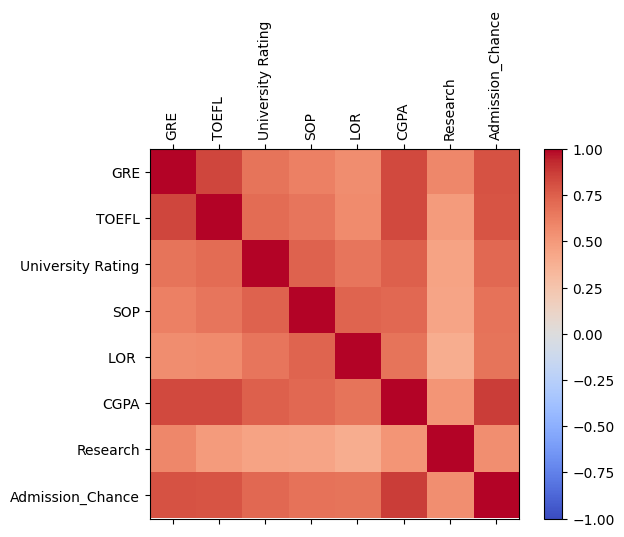

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

<Axes: >

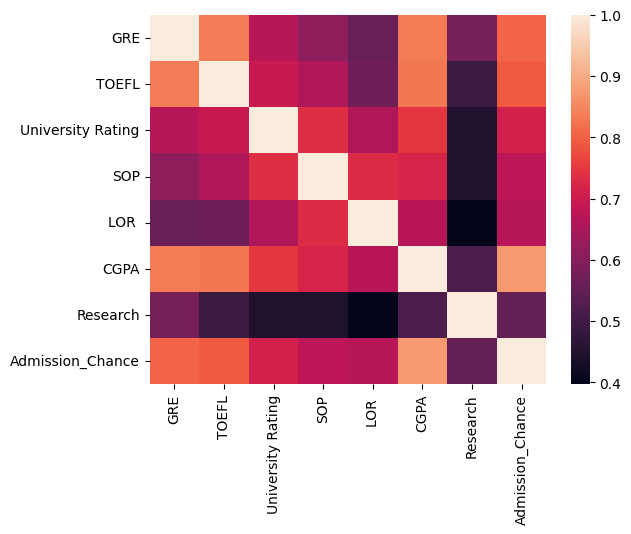

In [7]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<ipython-input-8-bbe4680cb143>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i][df['Admission_Chance']<0.72], color='r', label = 'Not Got Admission')
<ipython-input-8-bbe4680cb143>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i][df['Admission_Chance']>0.72], color='g', label = 'Got 

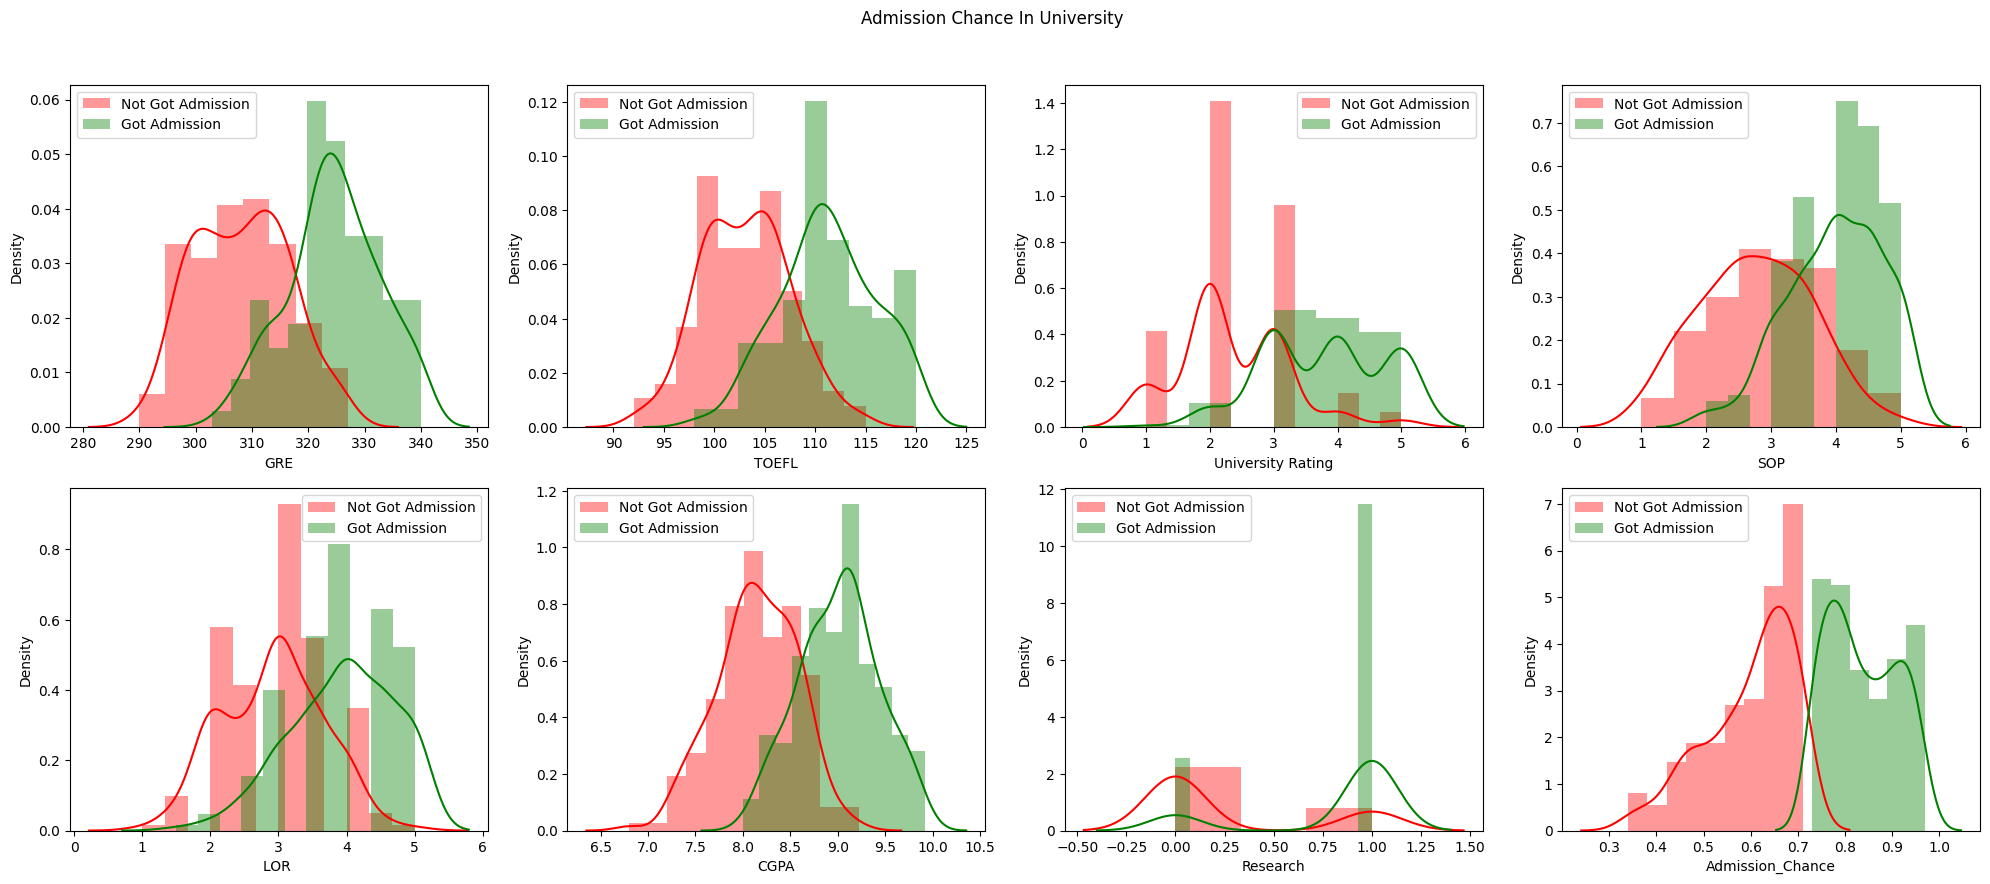

In [8]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['Admission_Chance']<0.72], color='r', label = 'Not Got Admission')
    sns.distplot(df[i][df['Admission_Chance']>0.72], color='g', label = 'Got Admission')
    plt.legend(loc='best')
fig.suptitle('Admission Chance In University ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

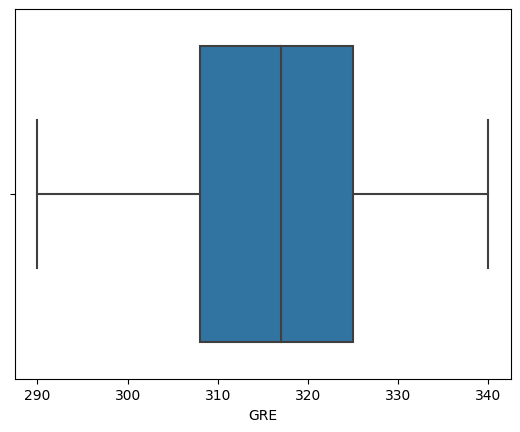

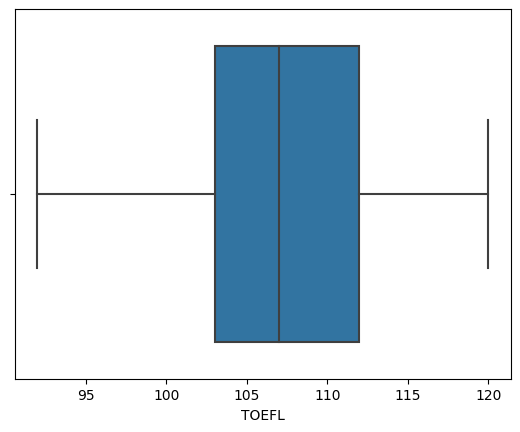

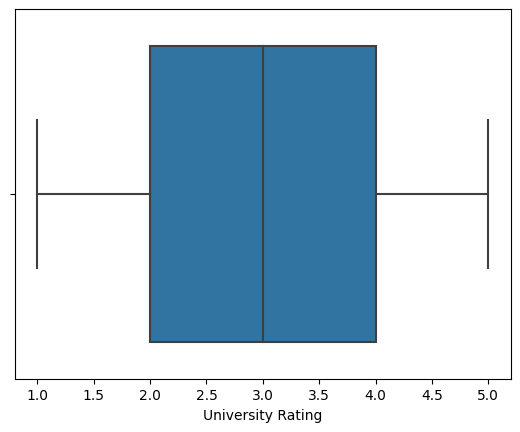

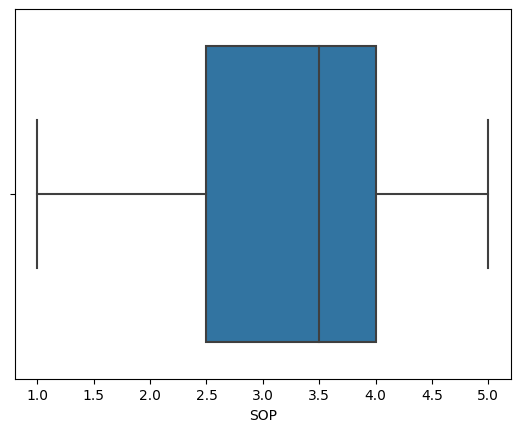

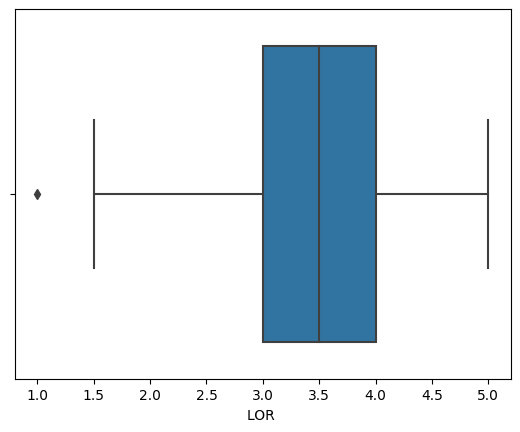

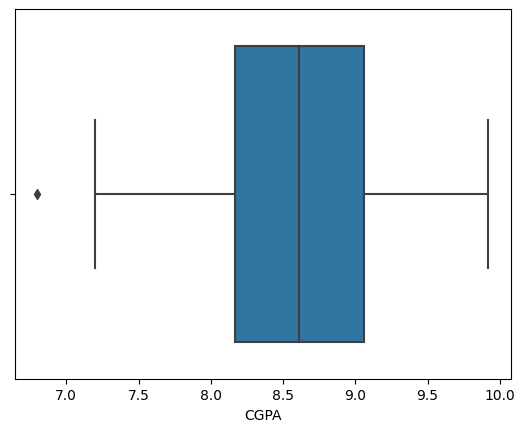

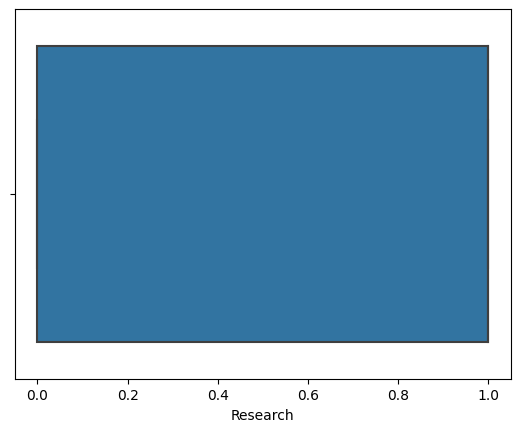

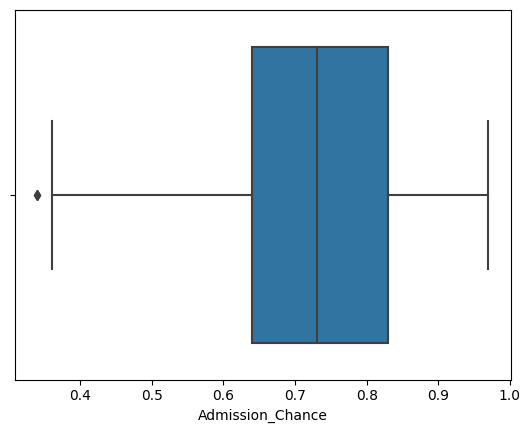

In [9]:
for column in df:
    plt.figure()
    sns.boxplot(x=df[column])

**thats good we have no outliers**

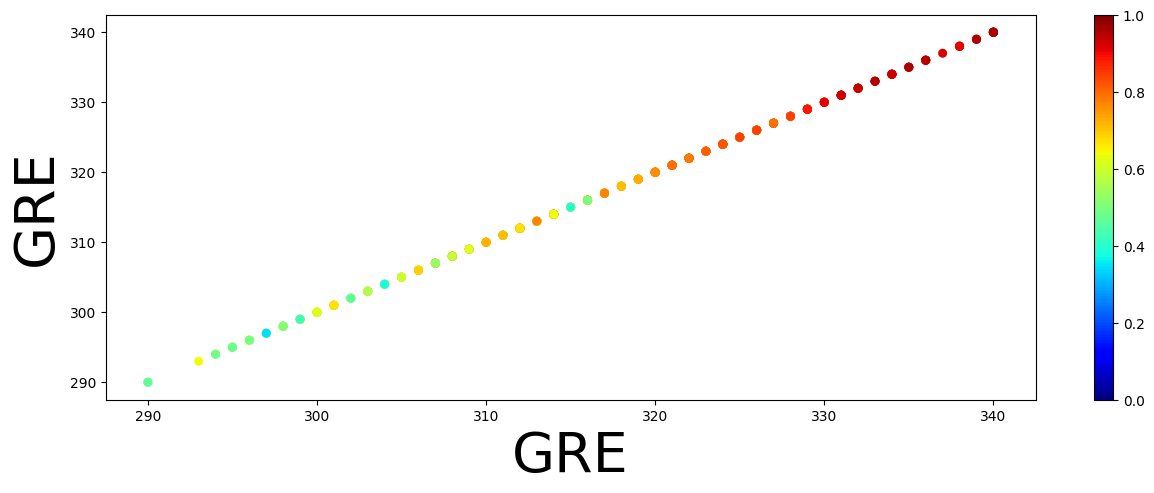

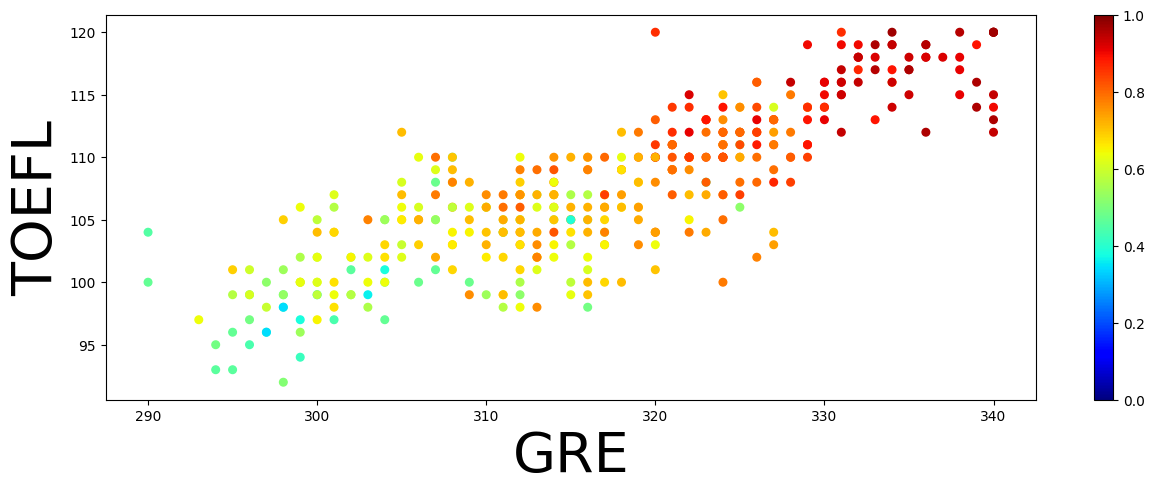

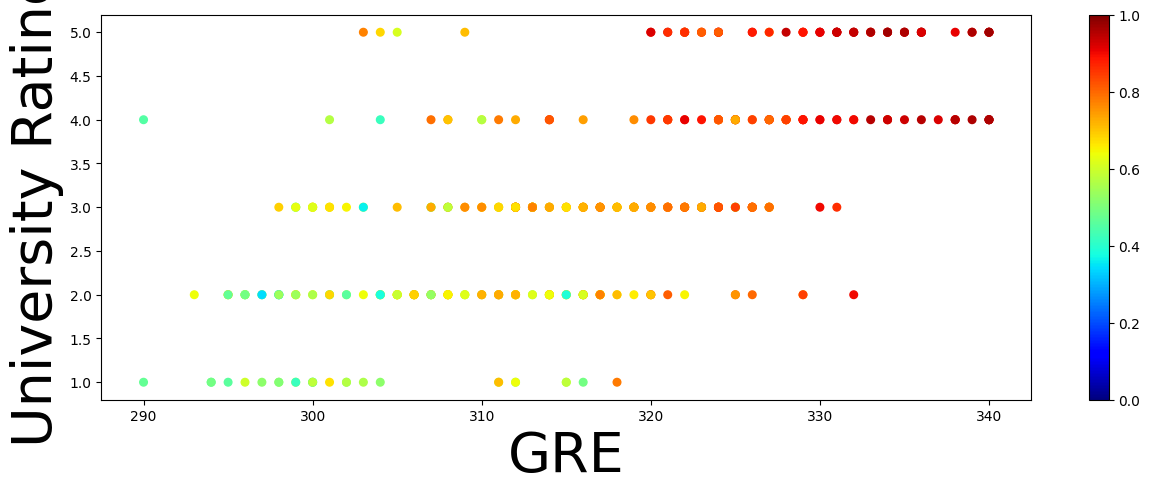

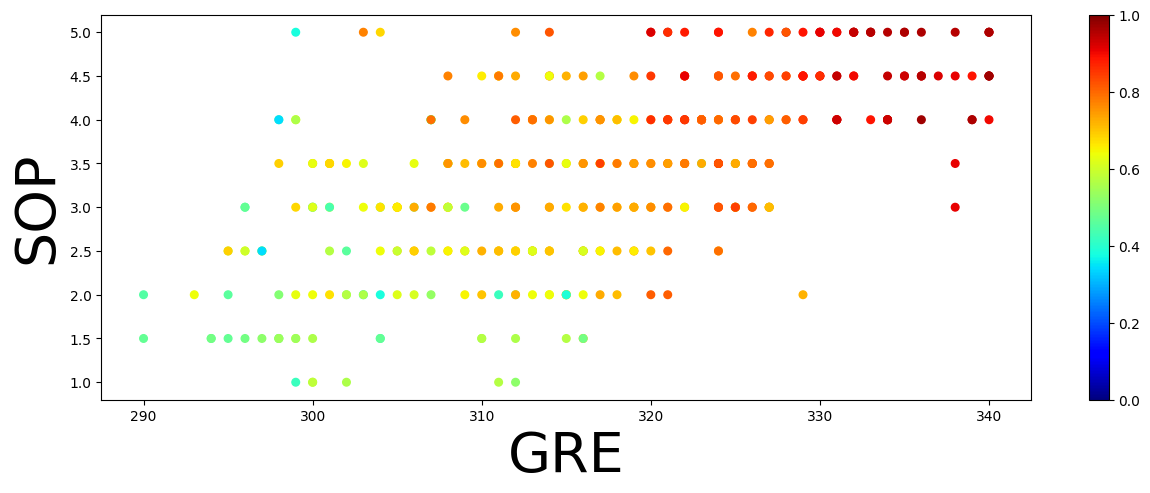

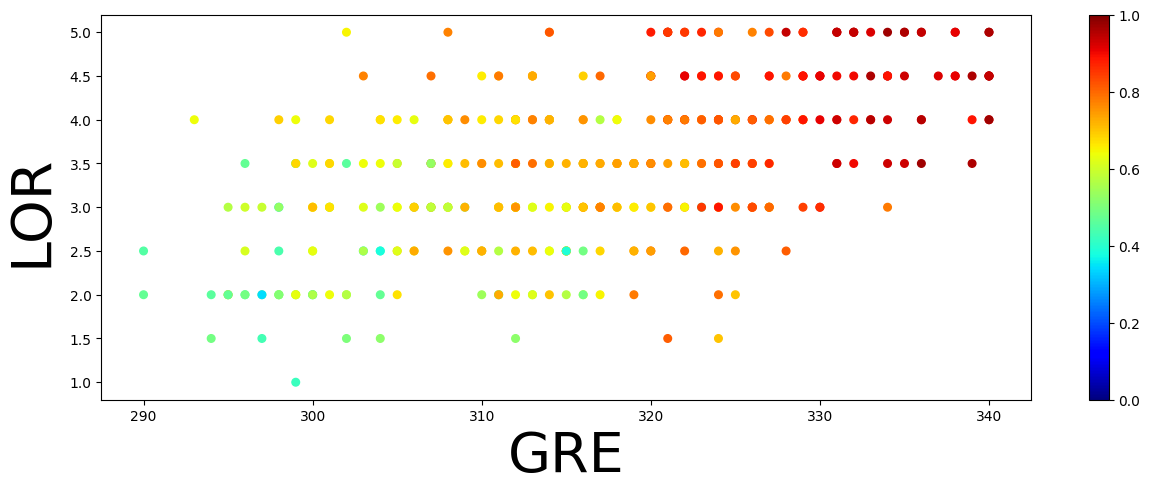

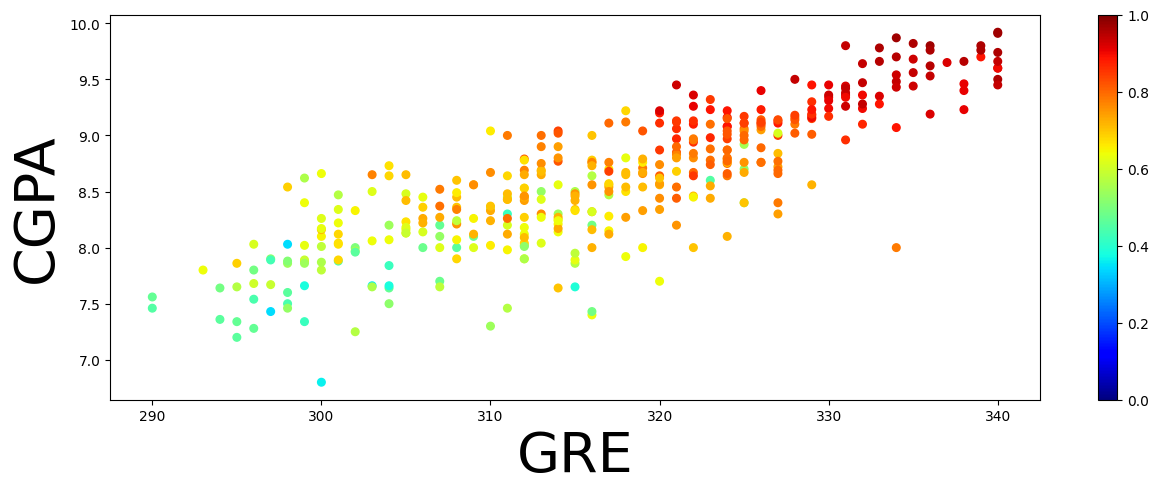

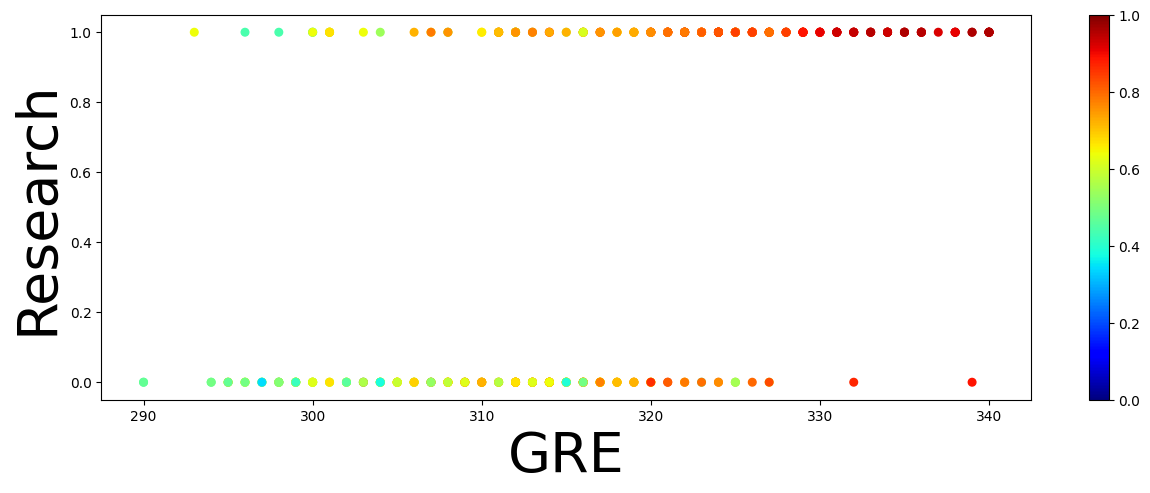

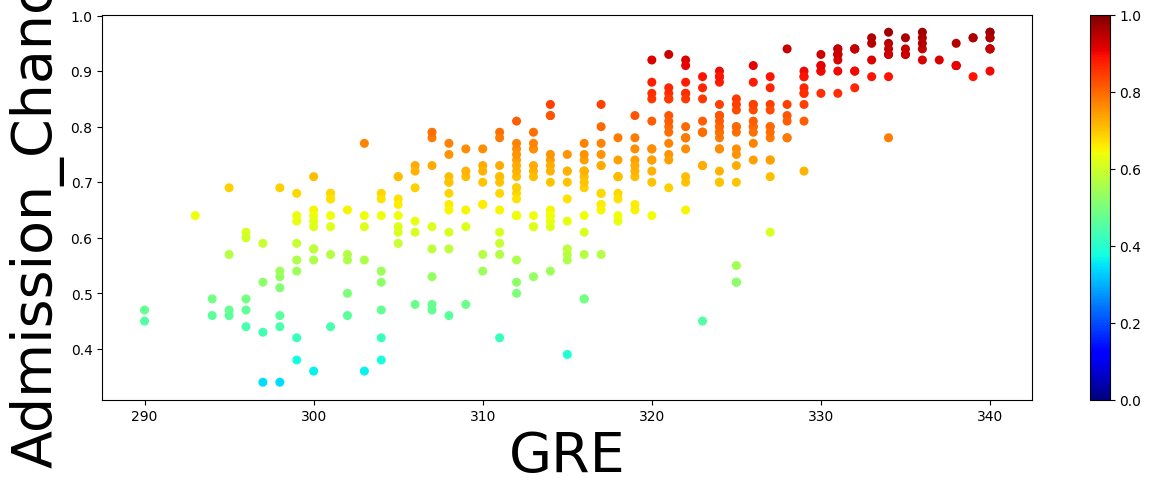

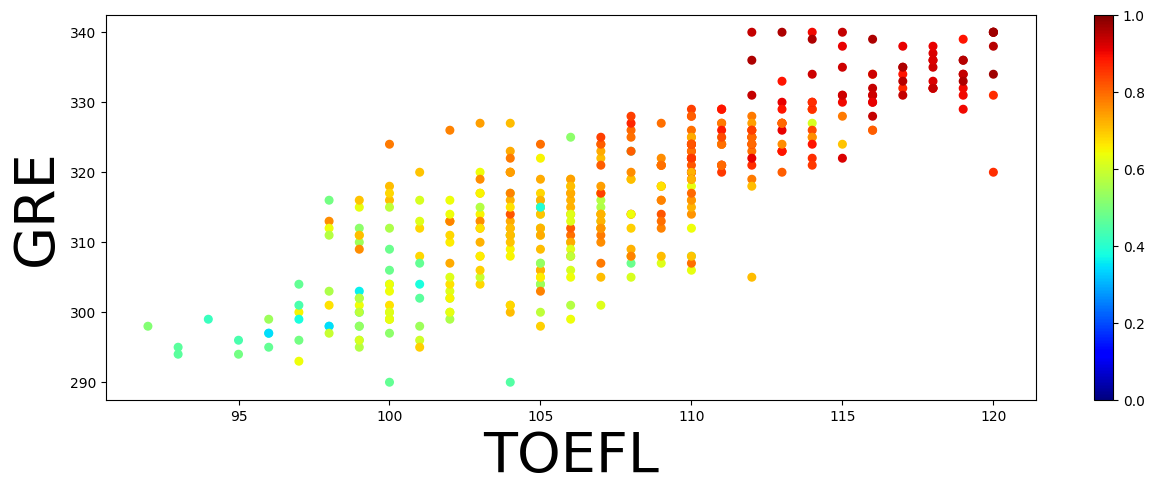

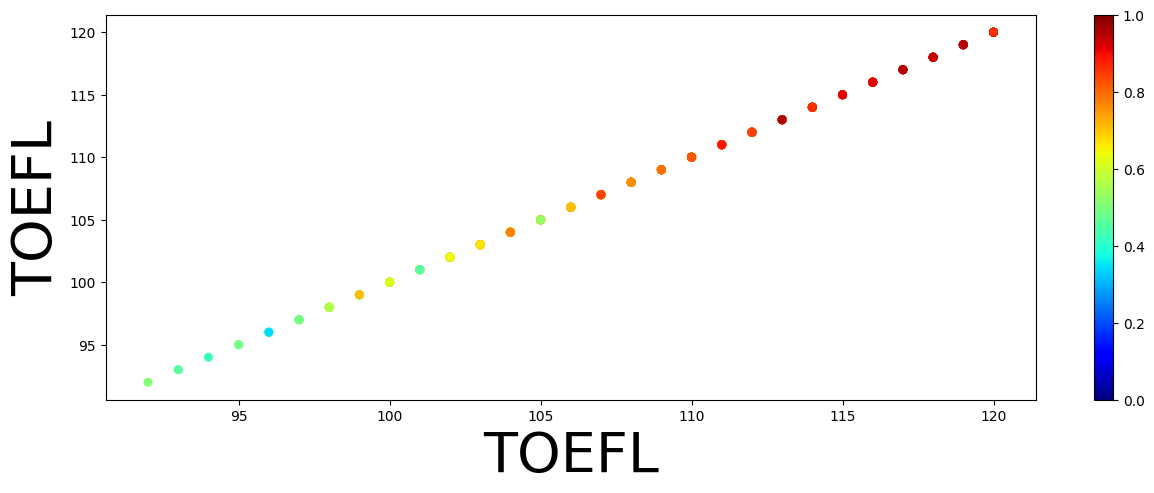

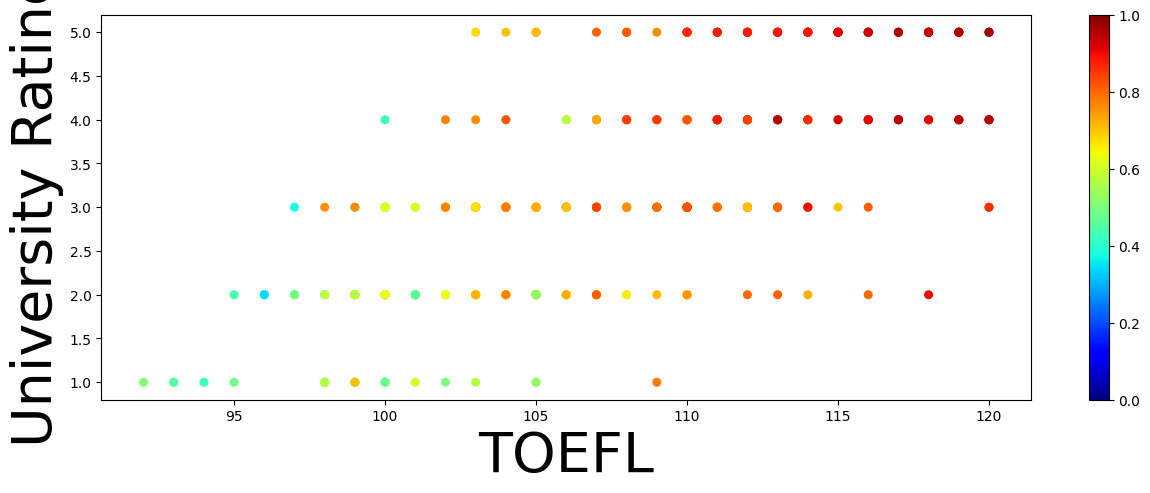

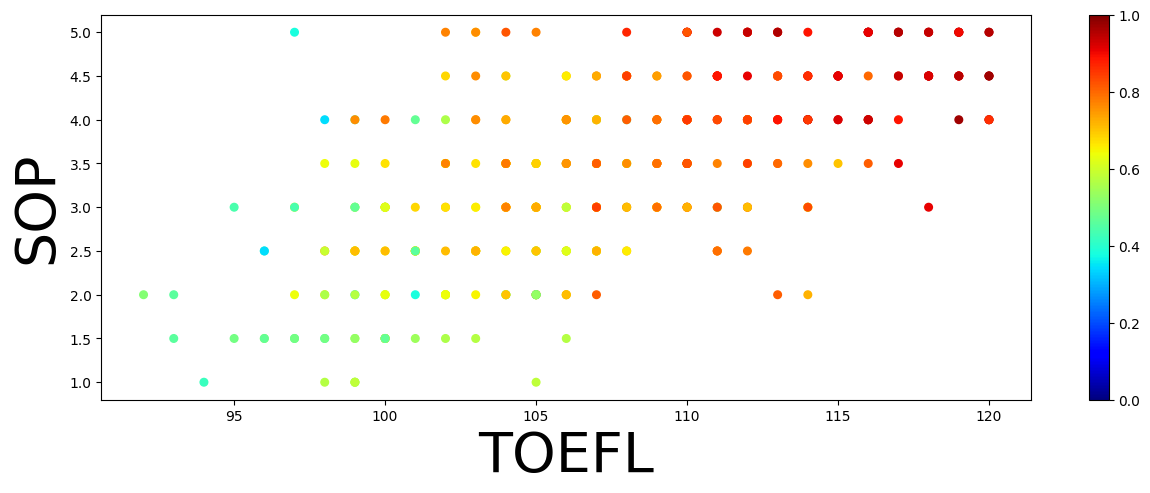

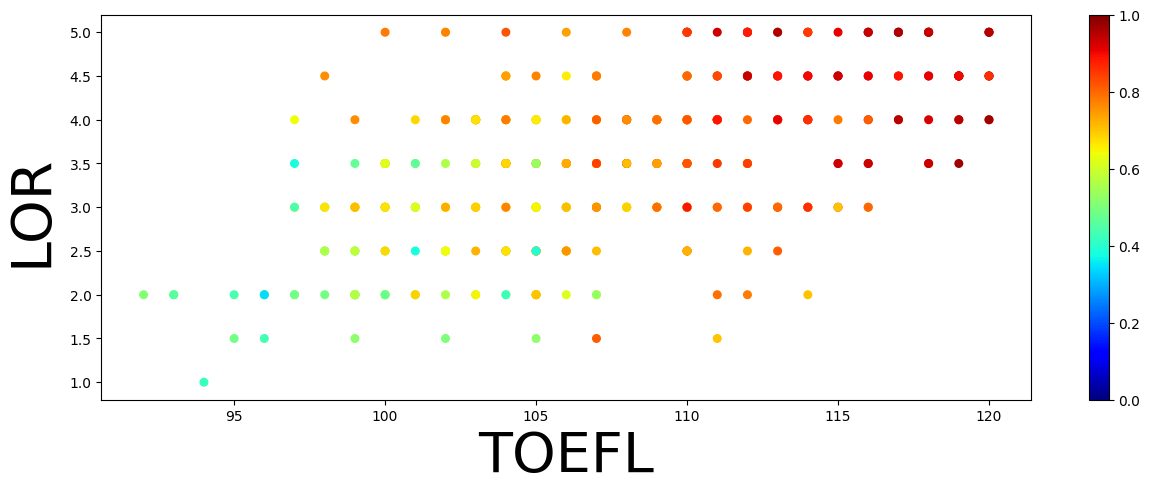

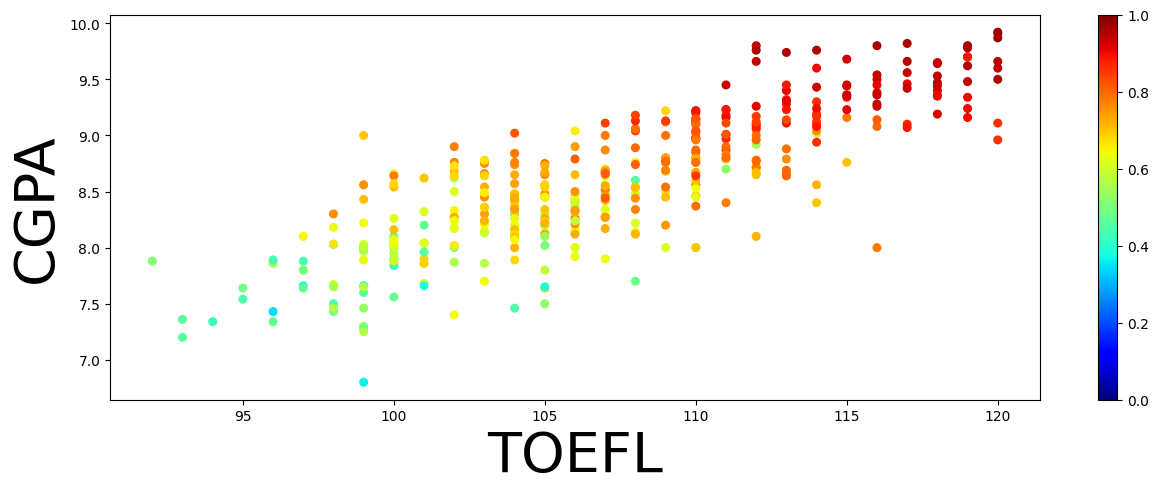

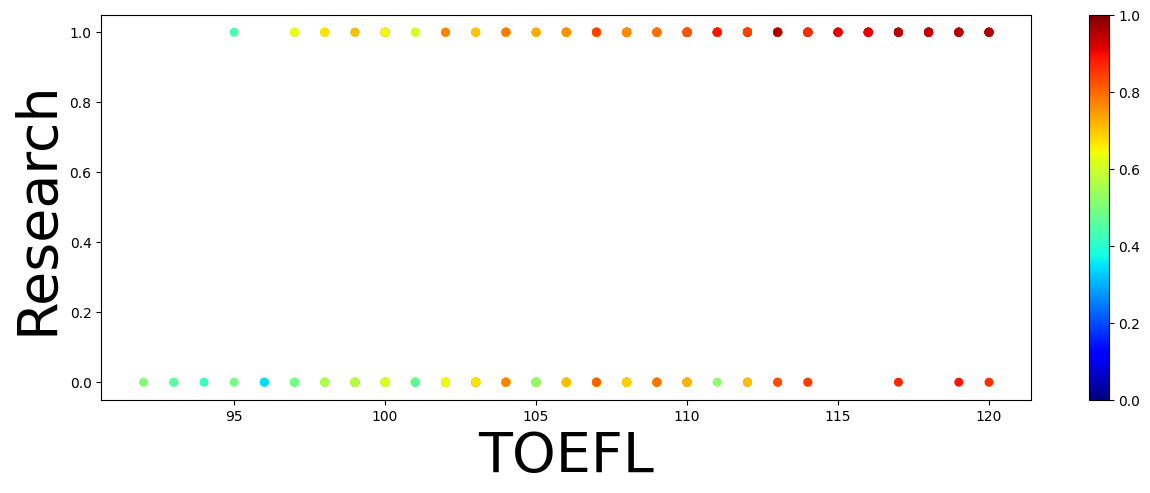

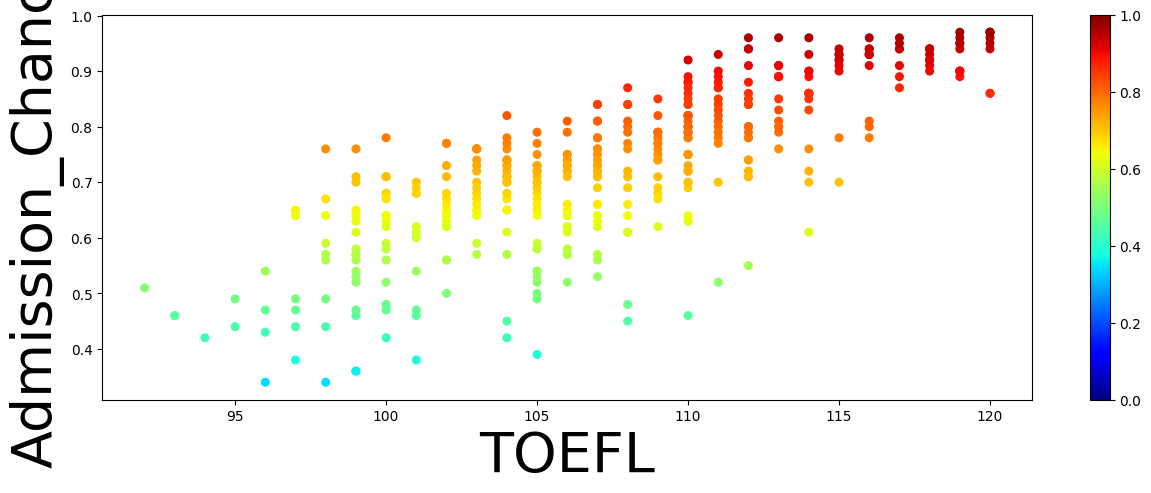

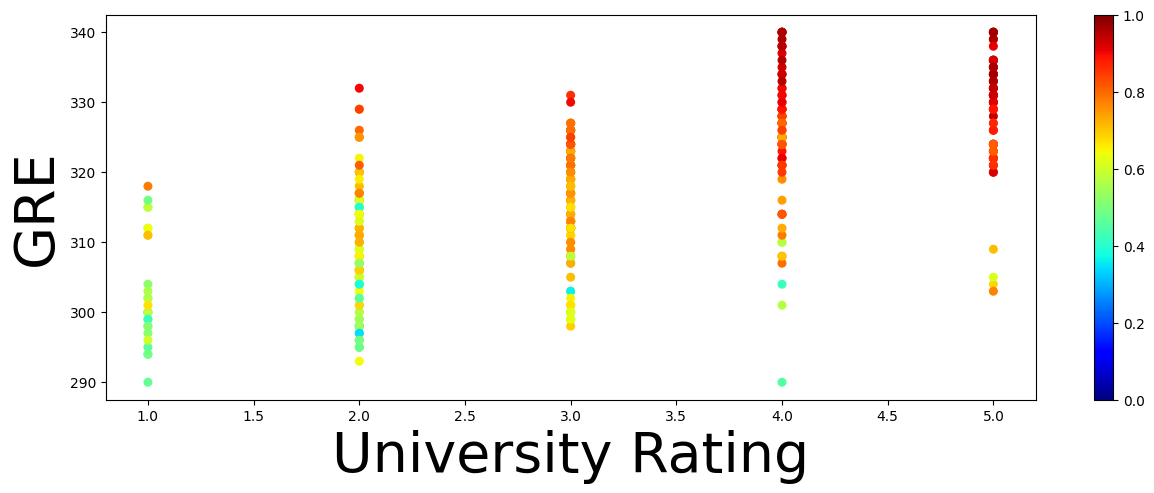

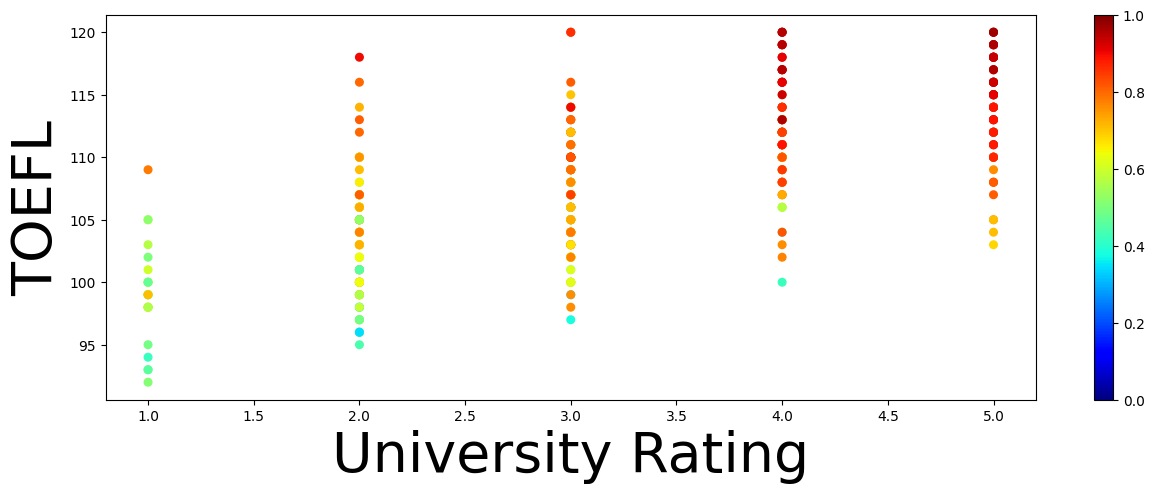

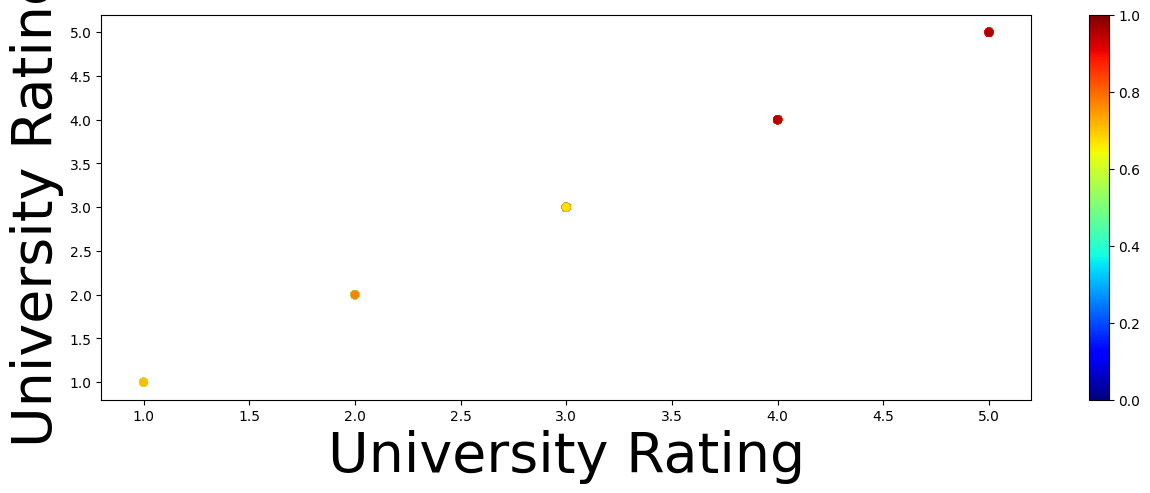

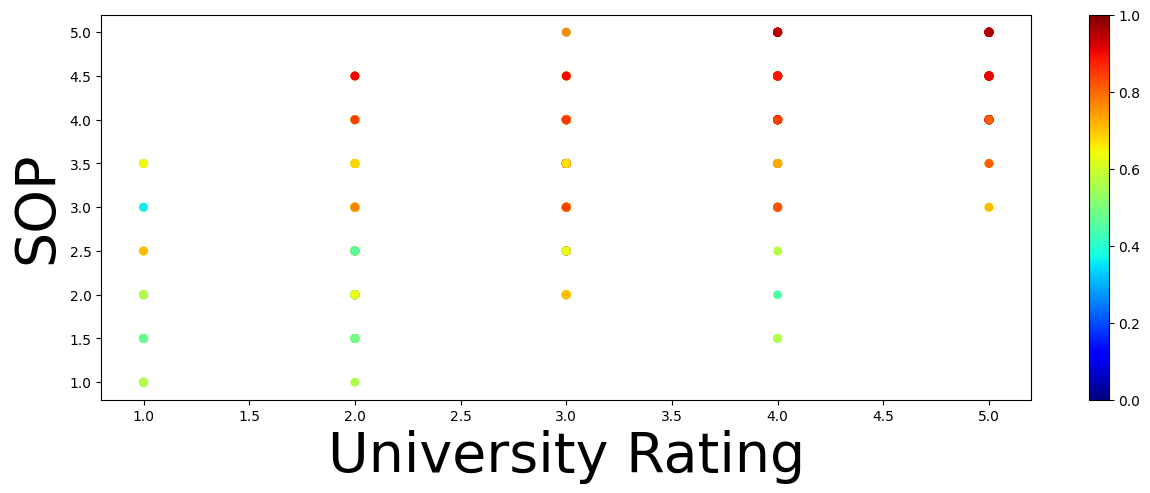

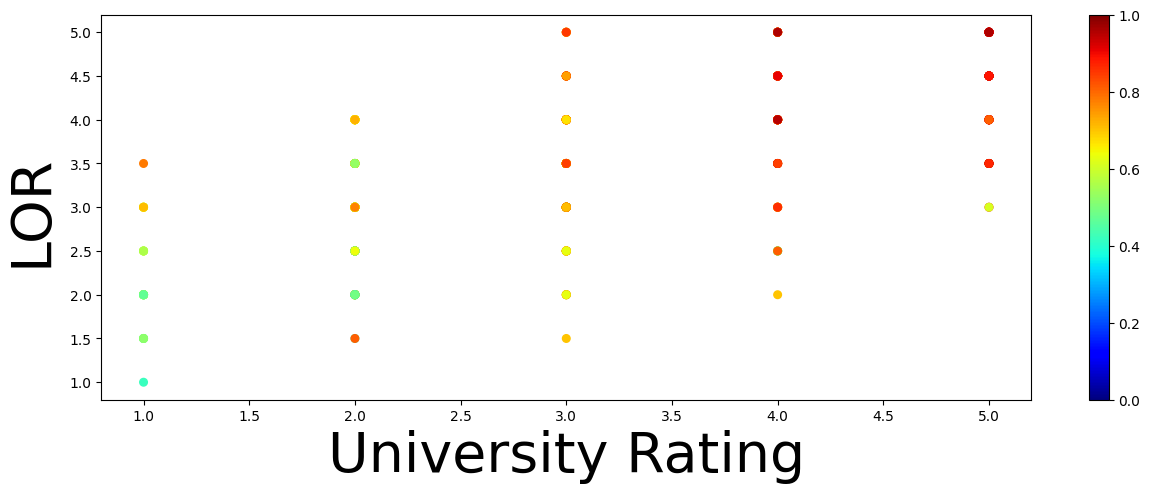

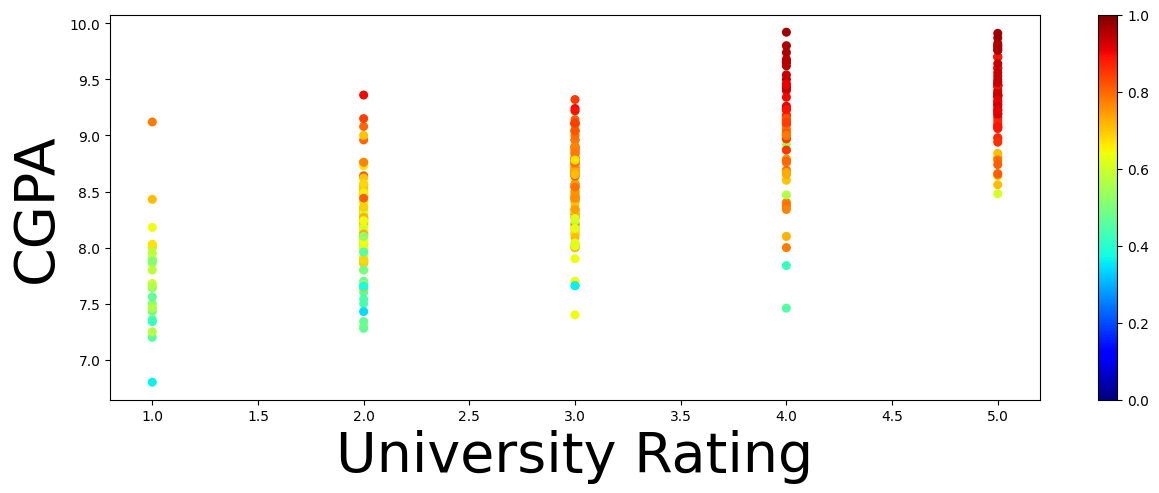

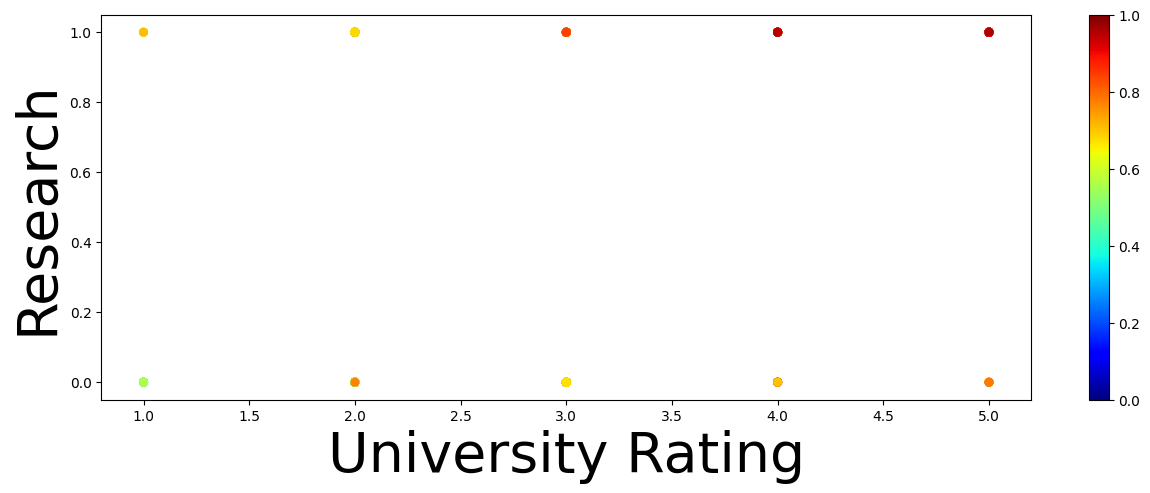

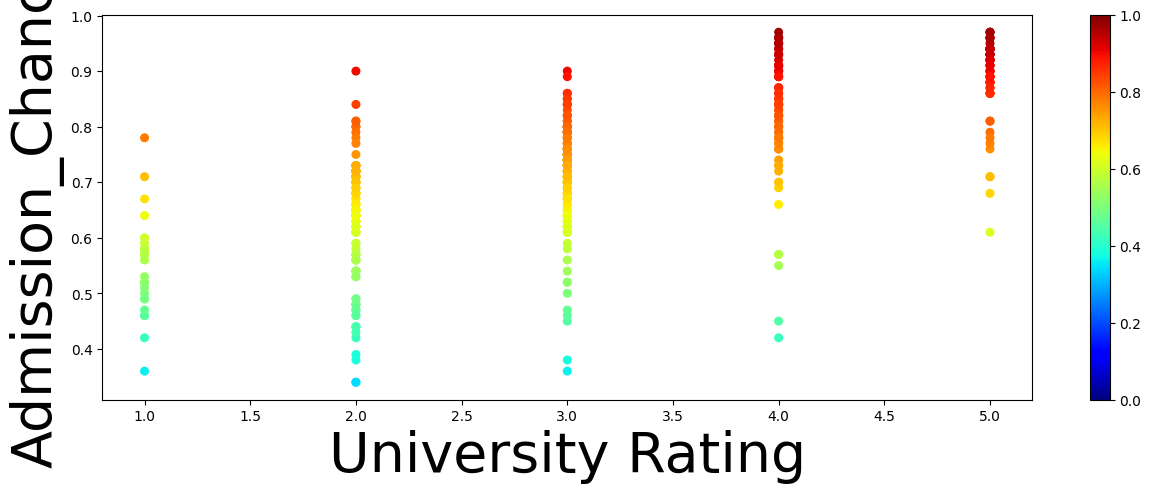

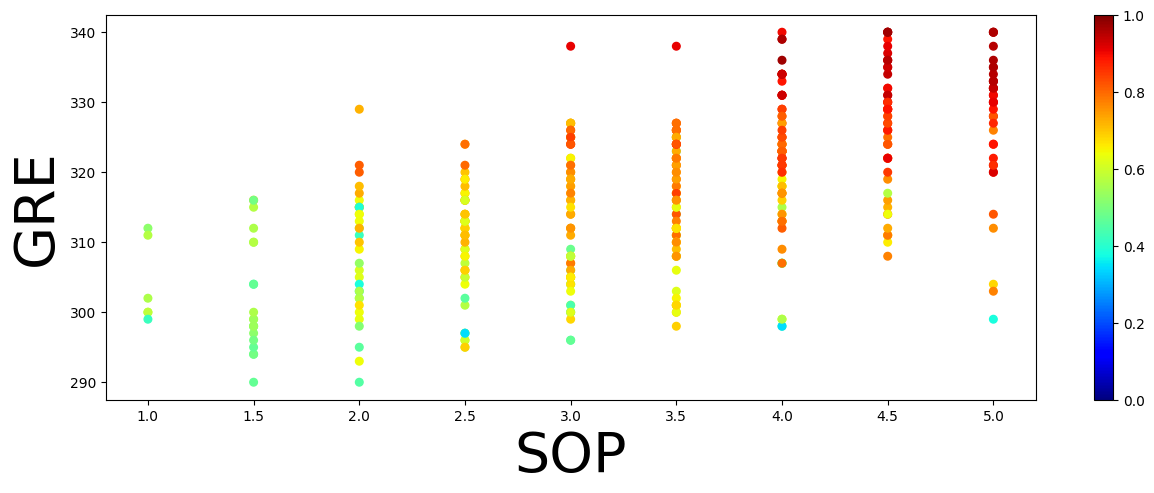

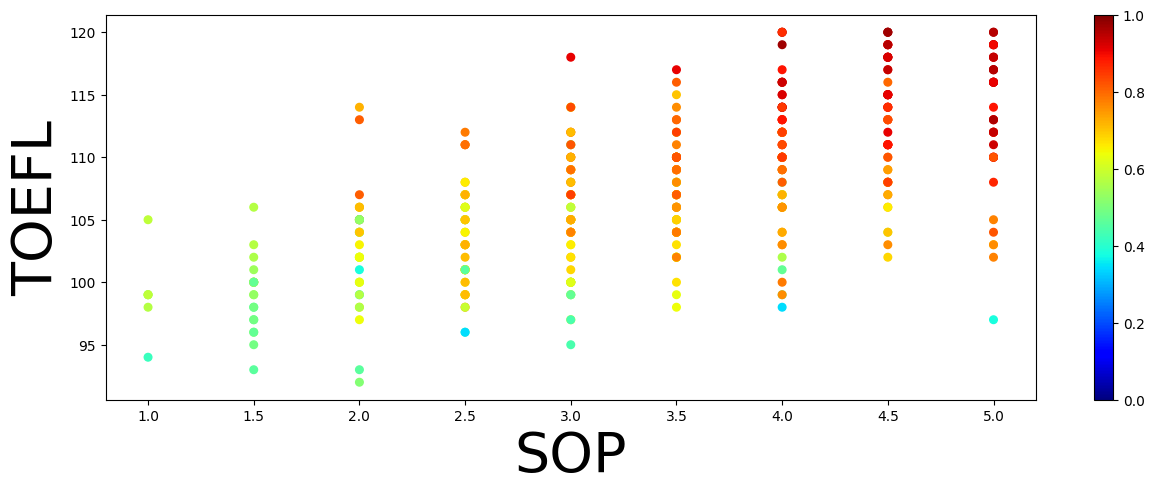

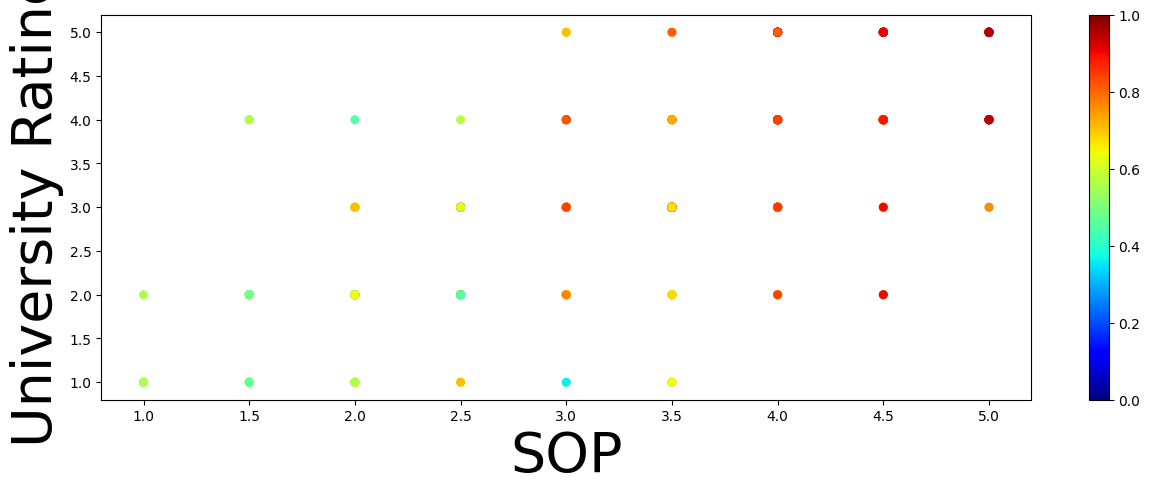

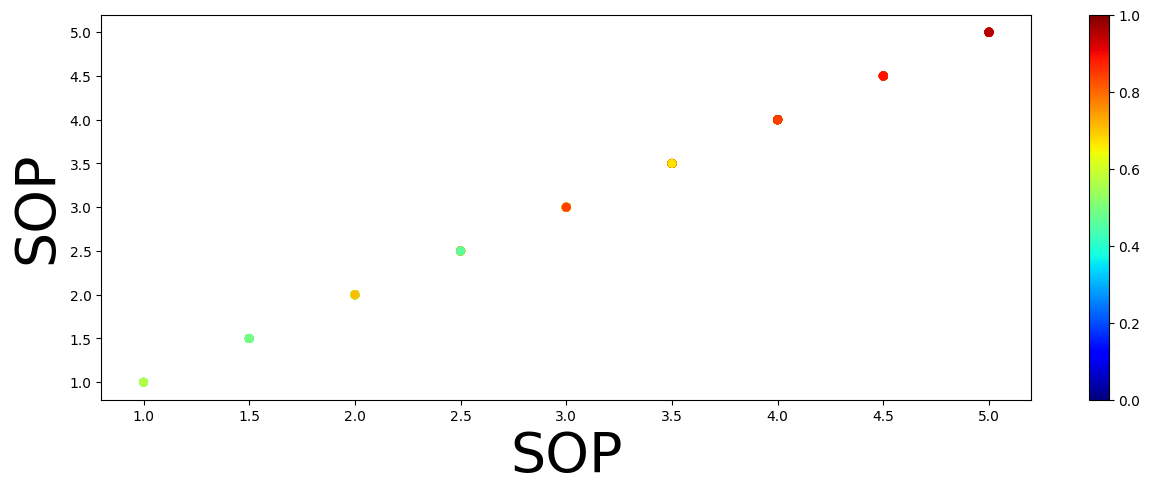

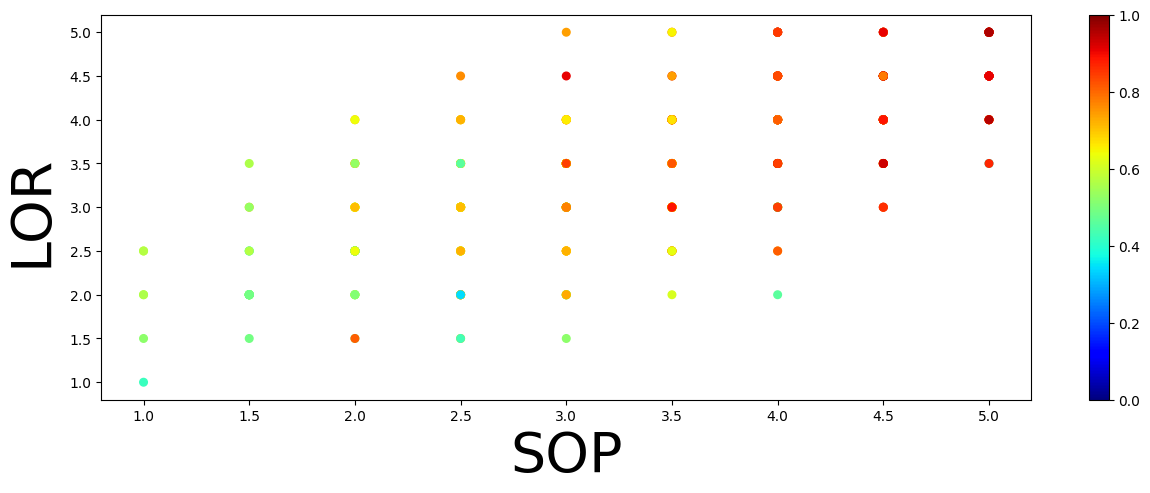

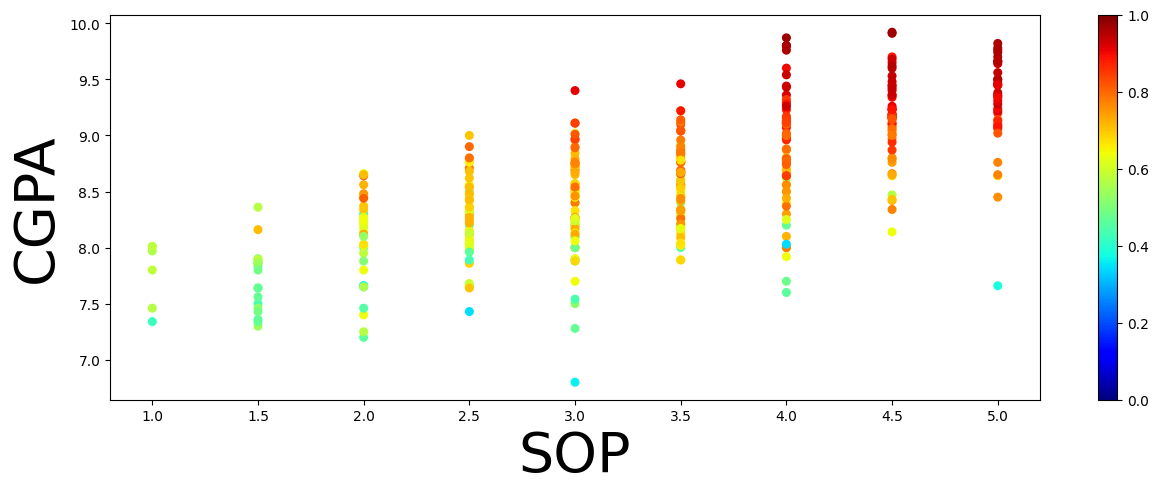

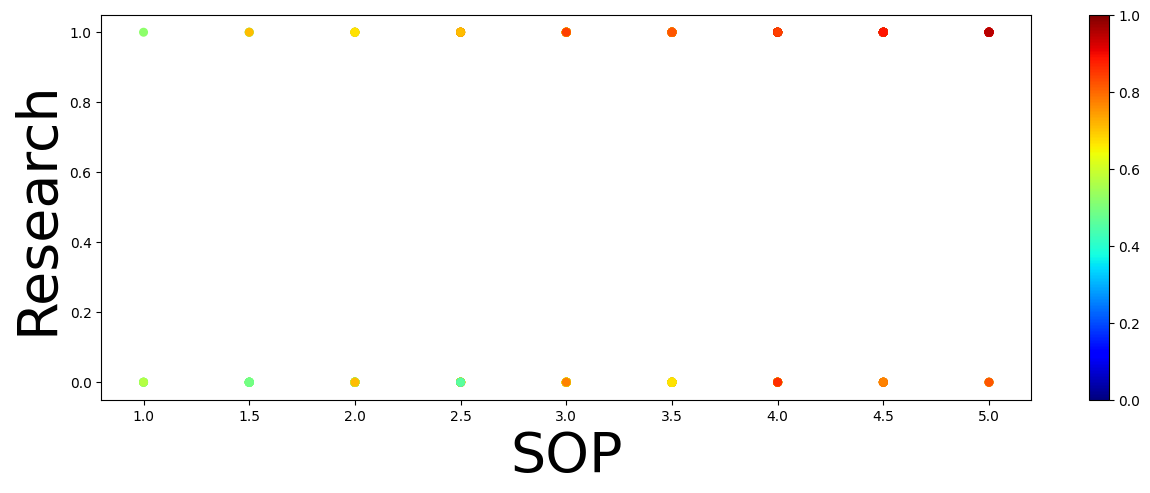

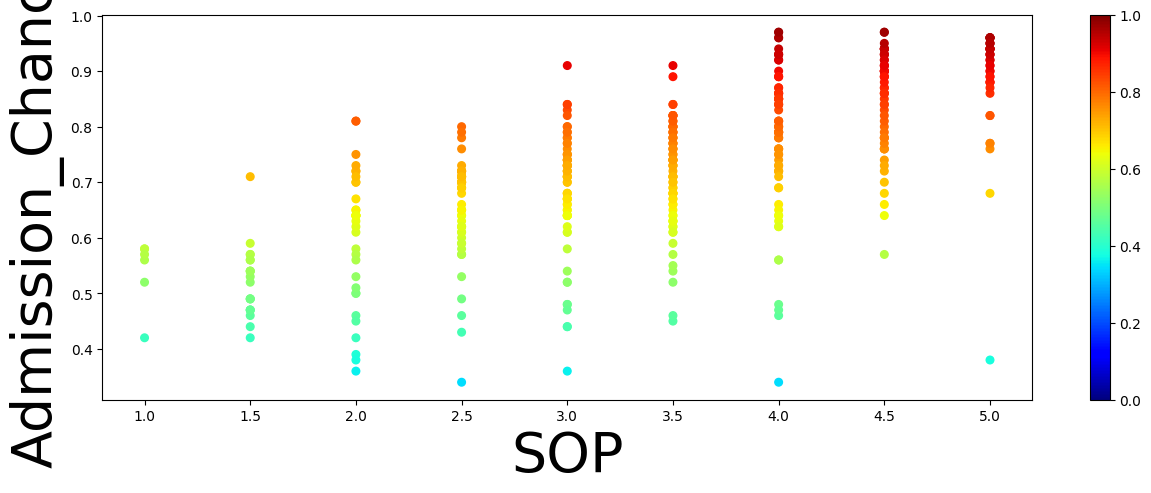

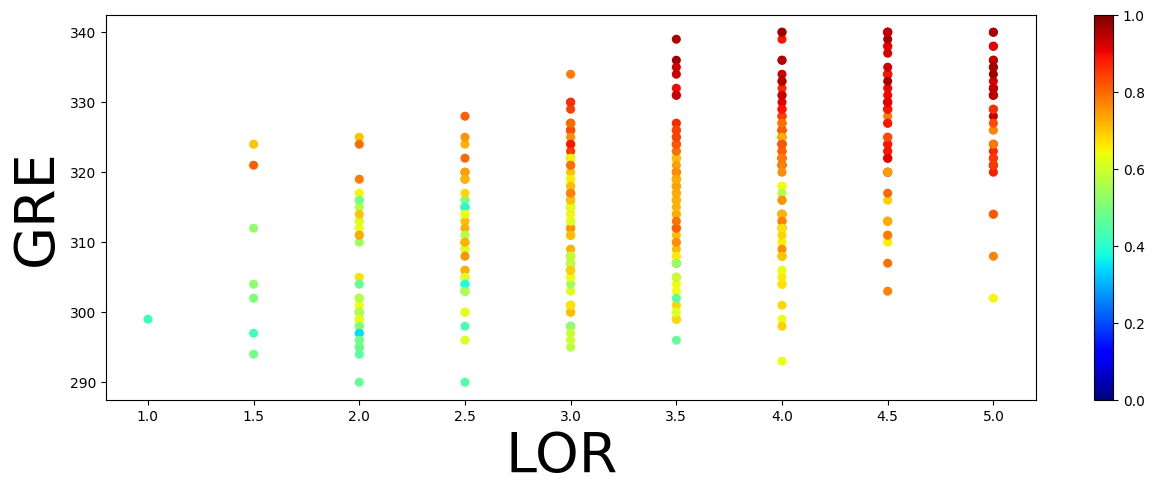

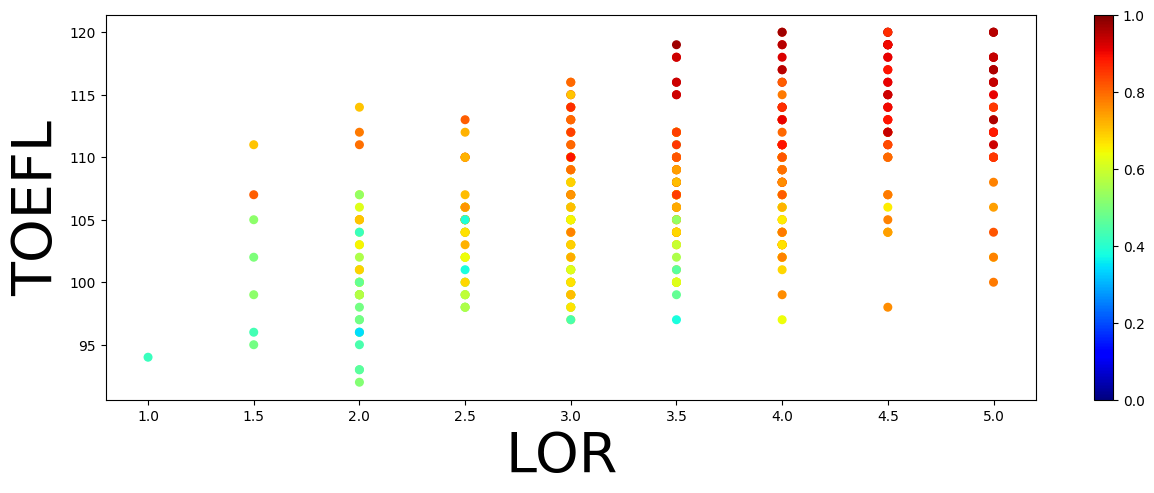

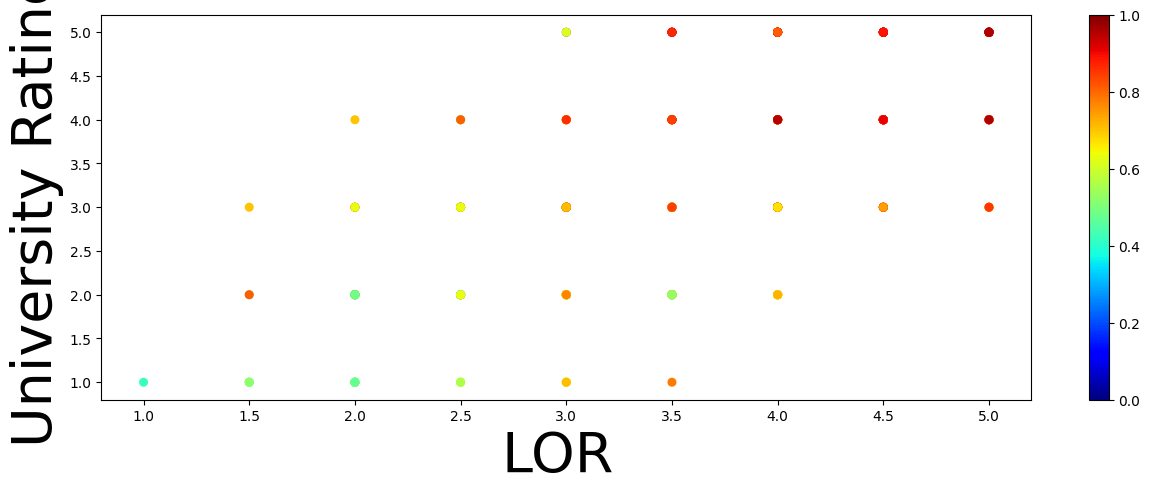

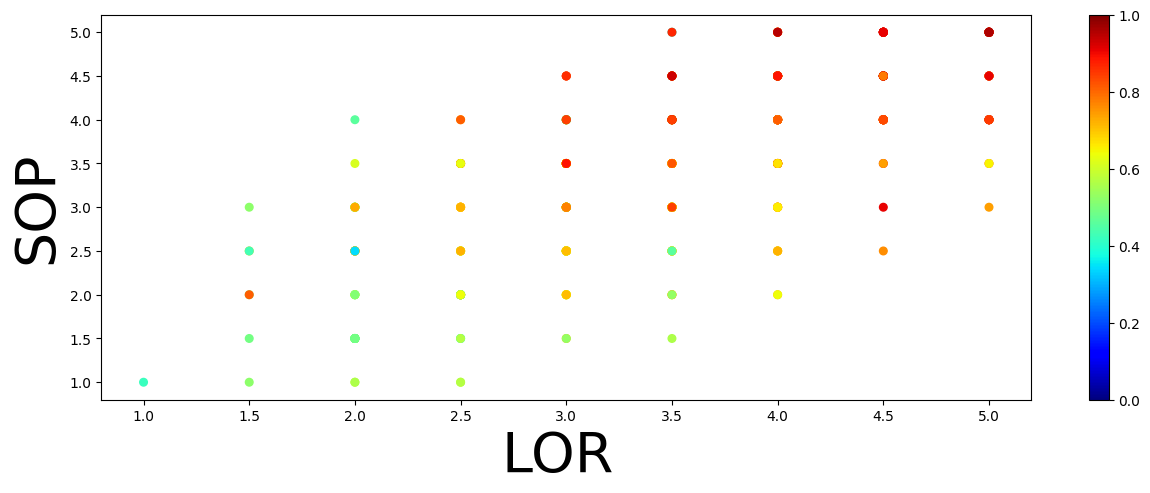

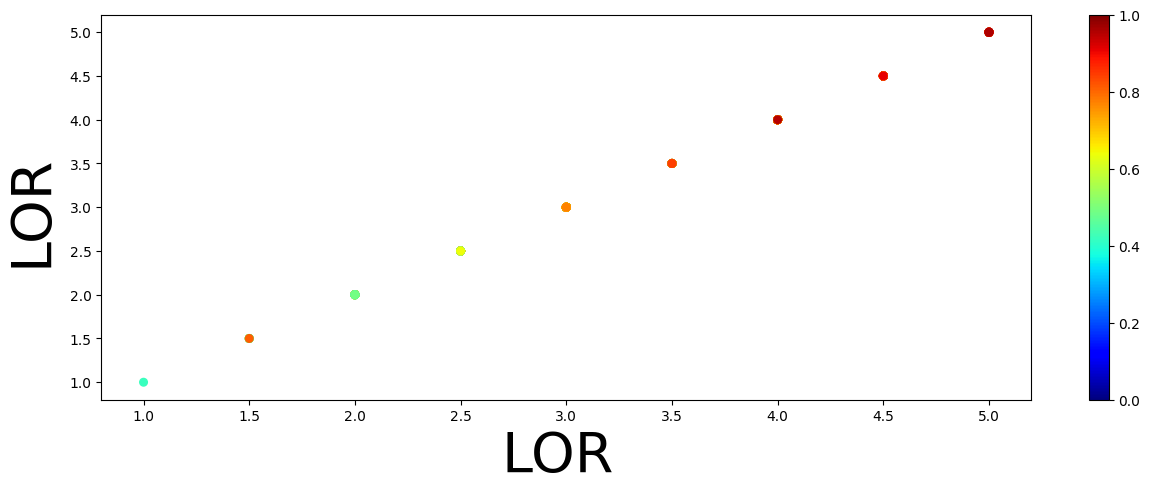

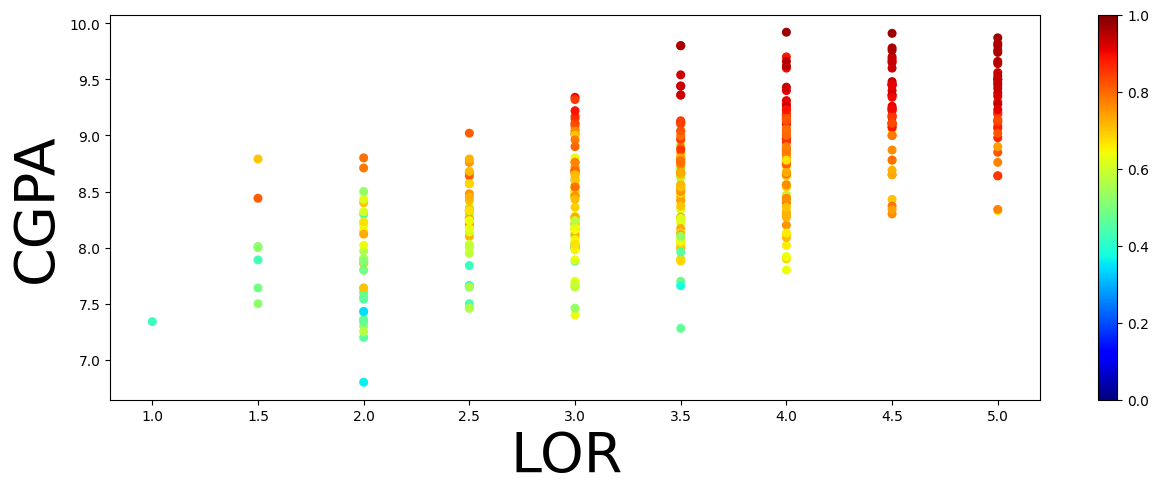

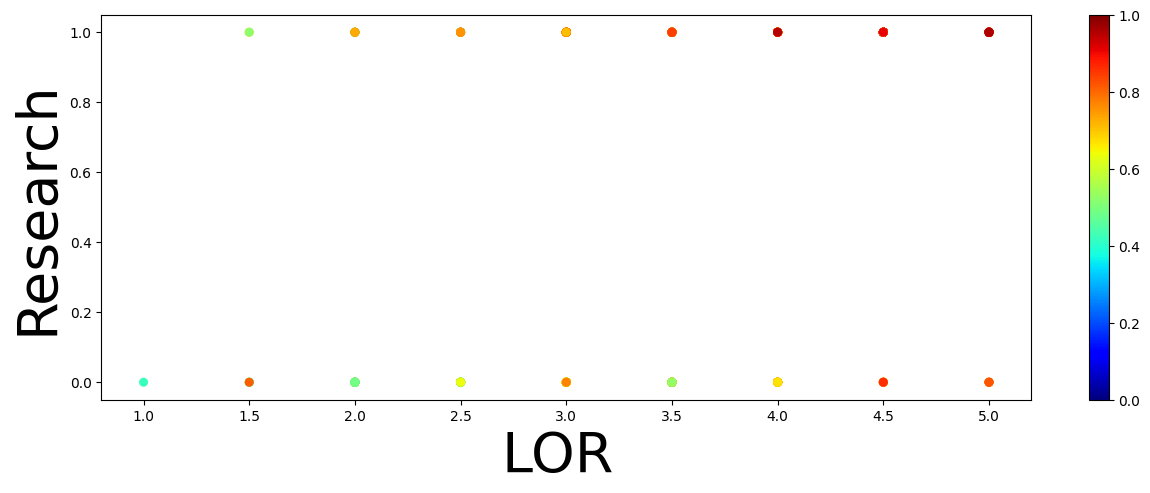

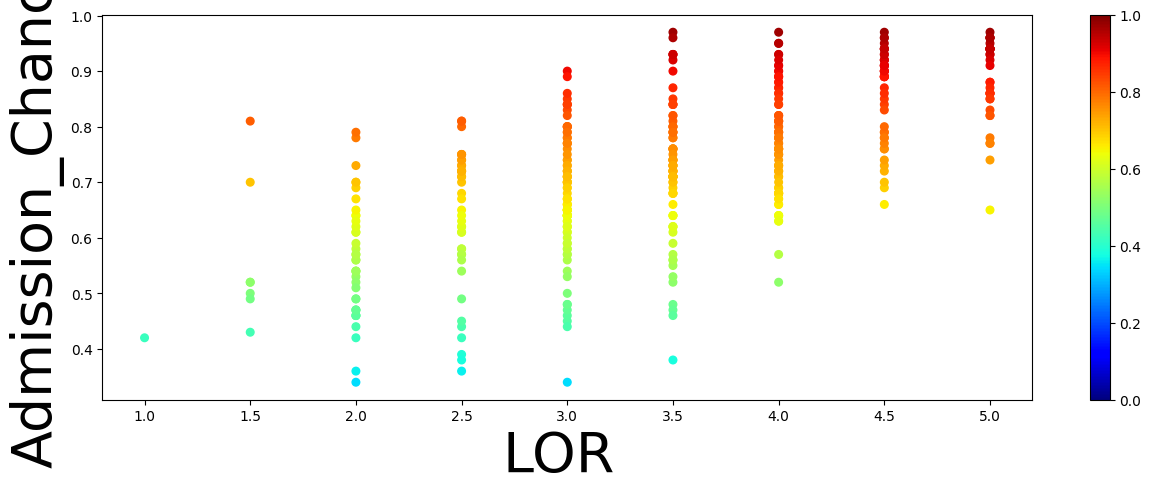

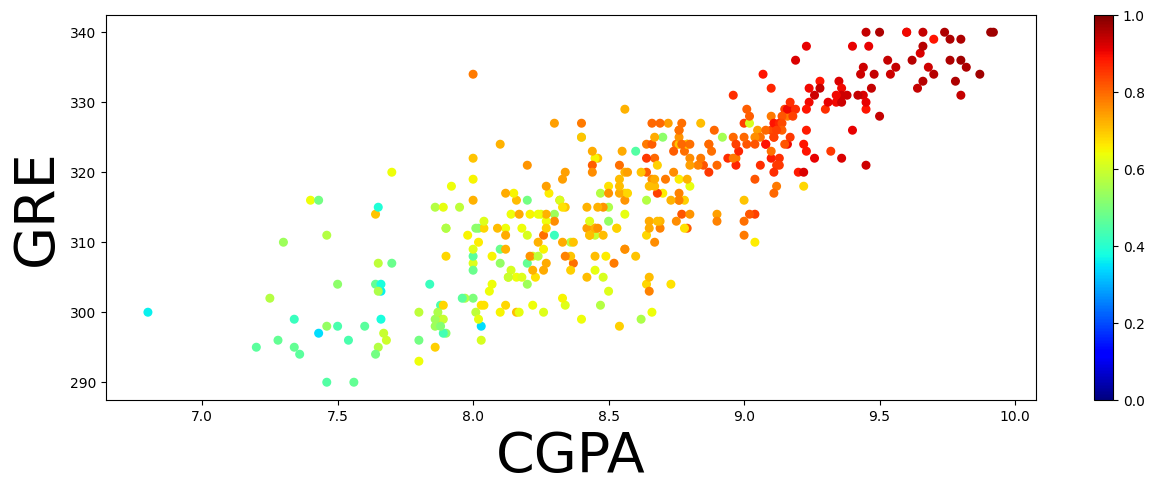

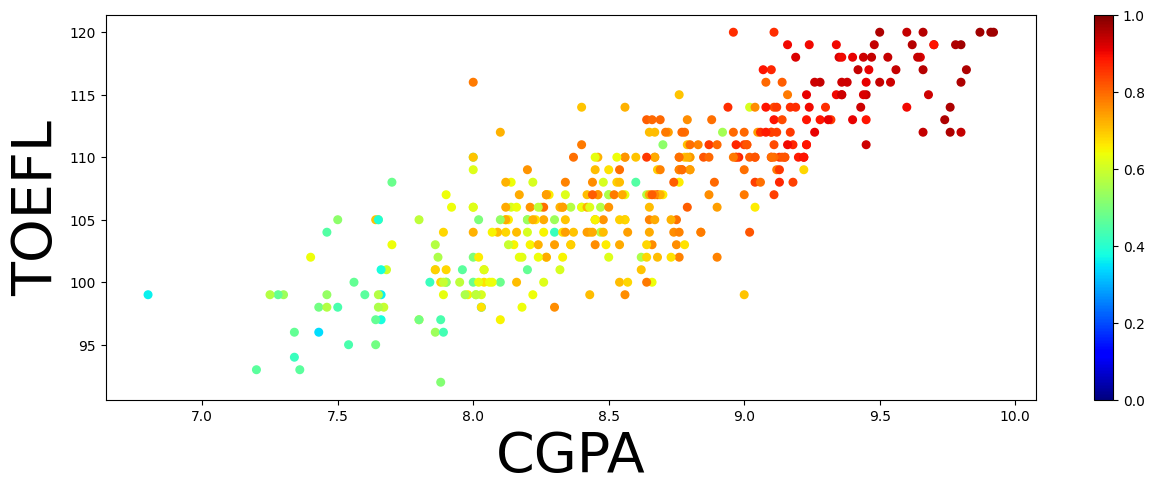

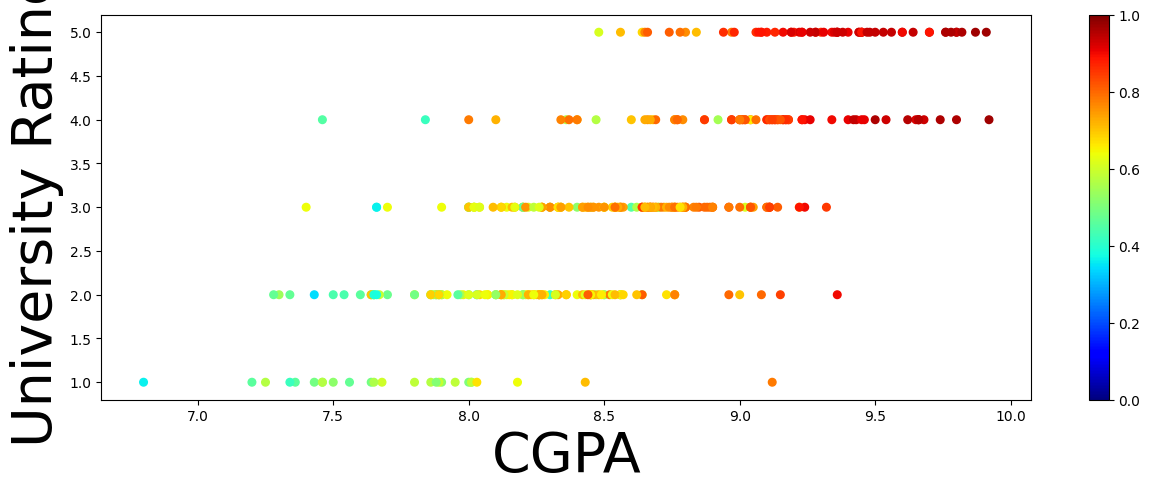

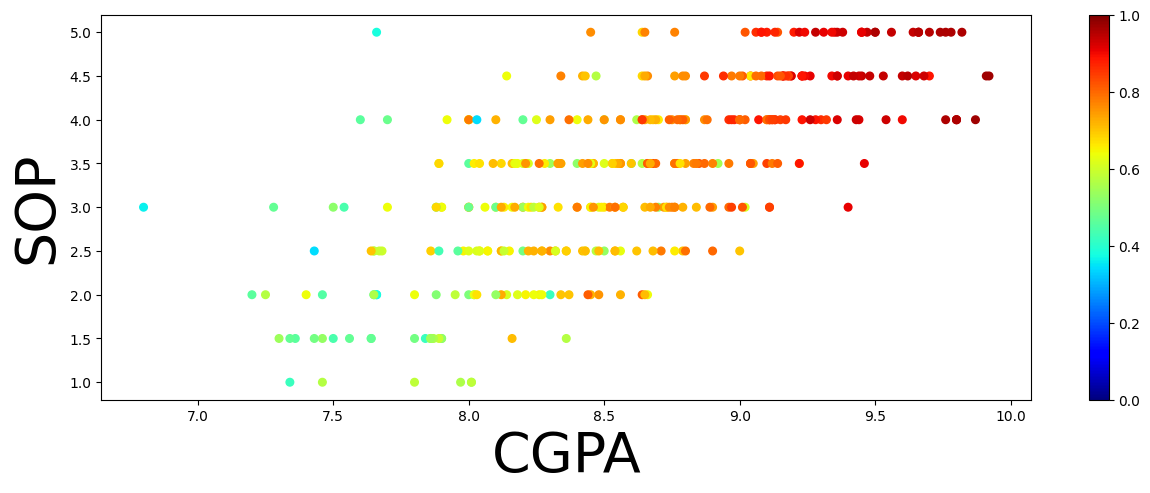

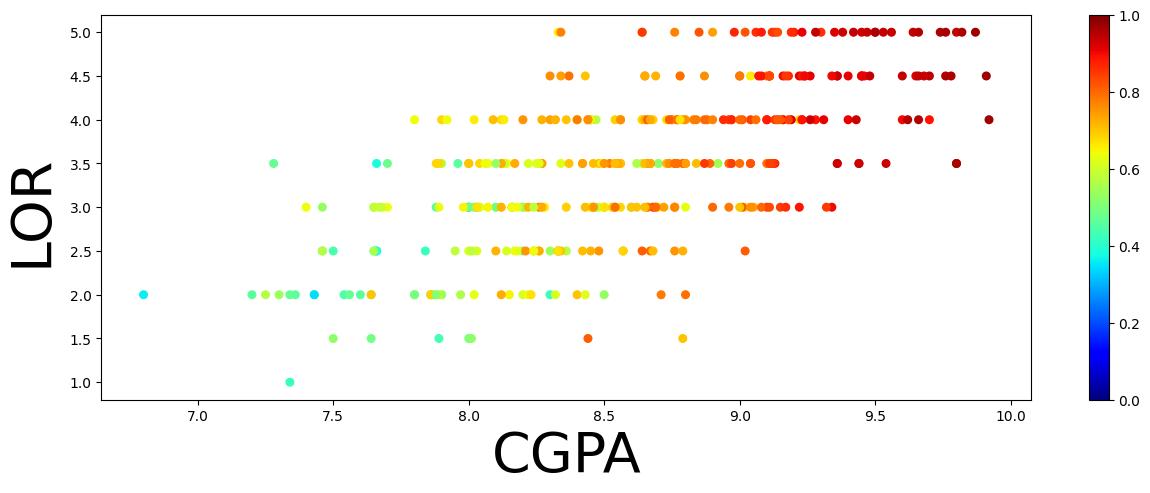

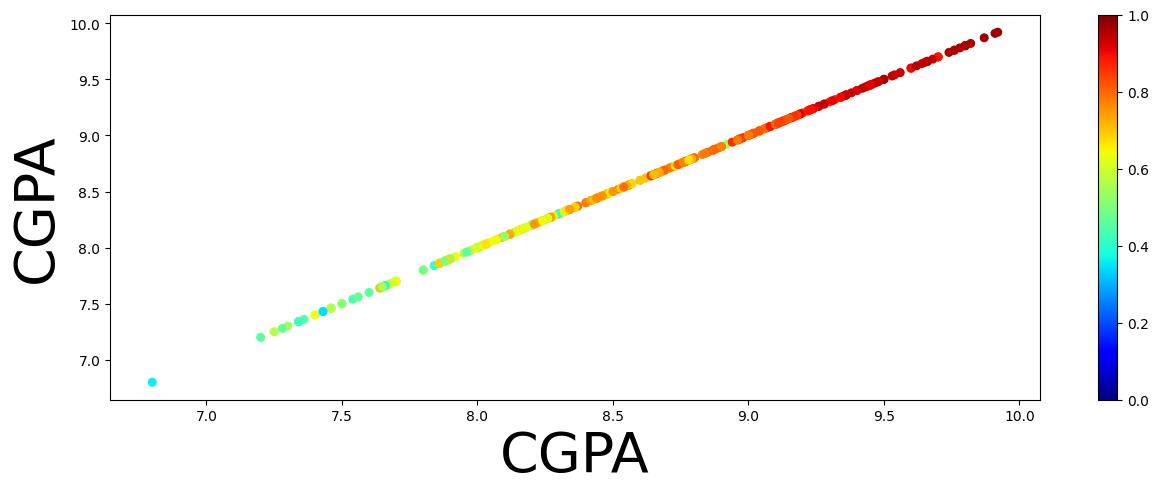

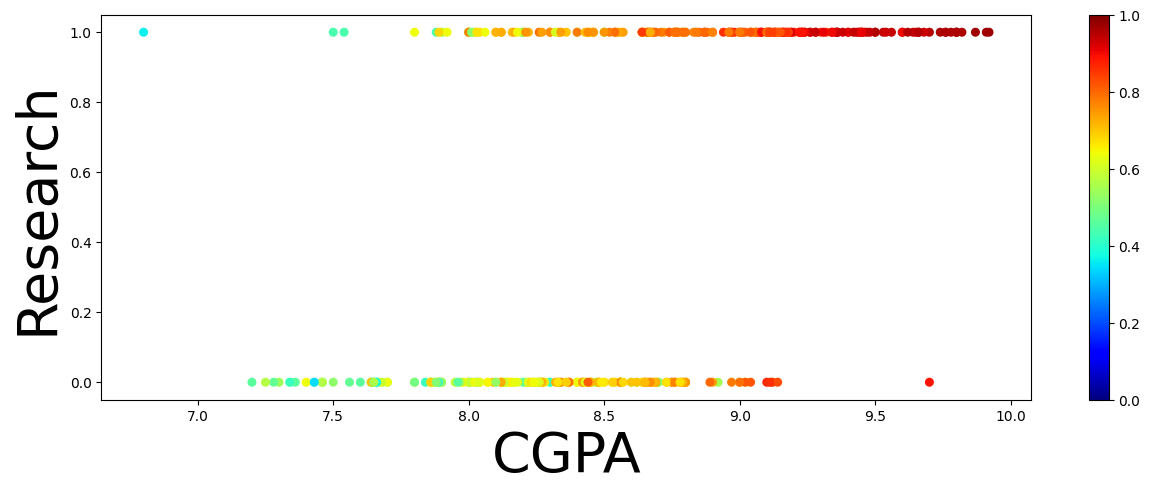

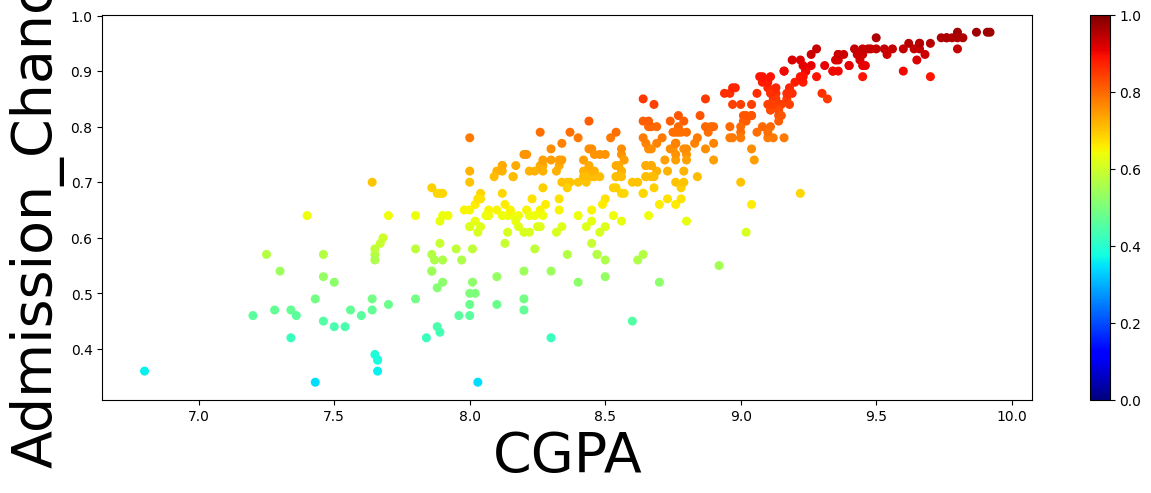

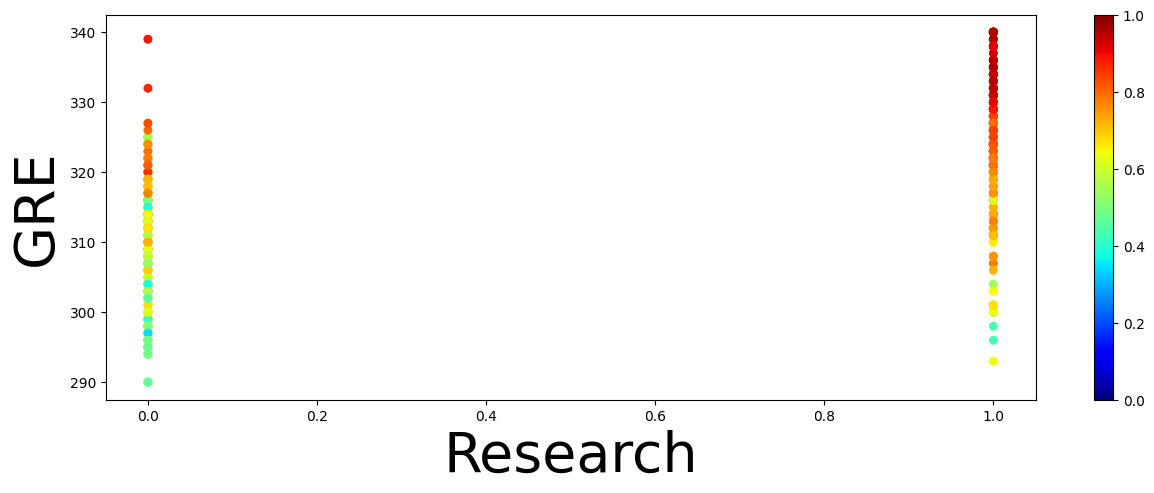

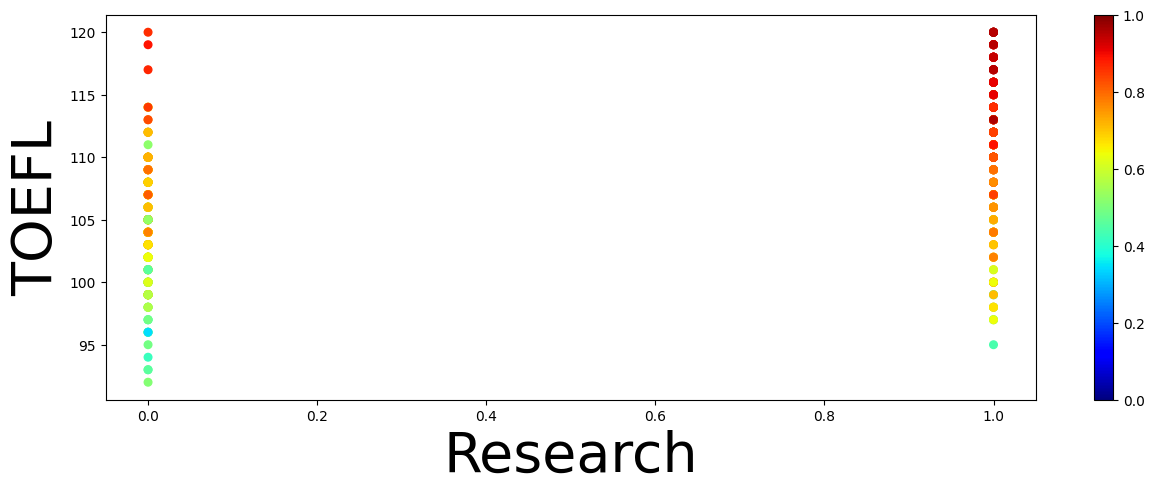

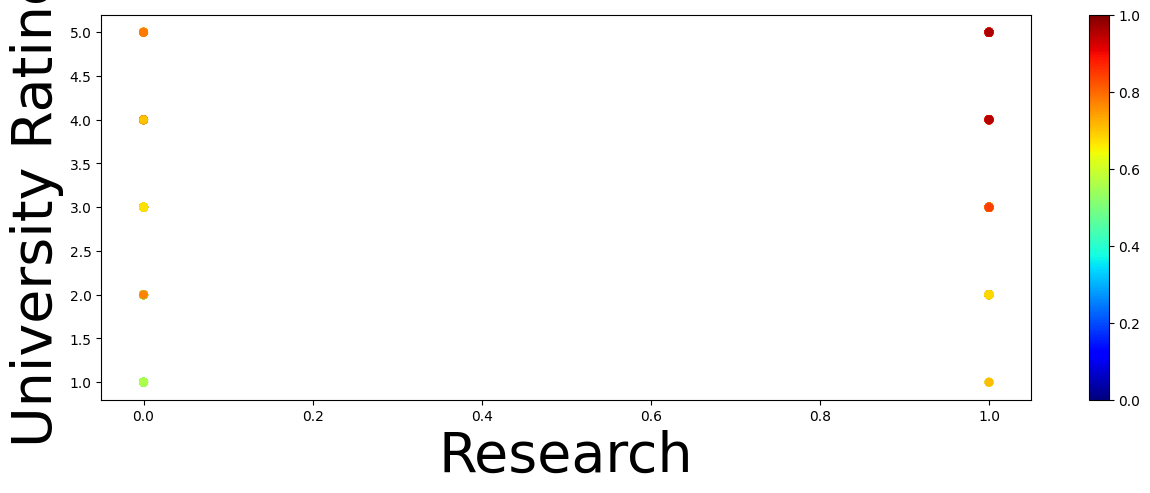

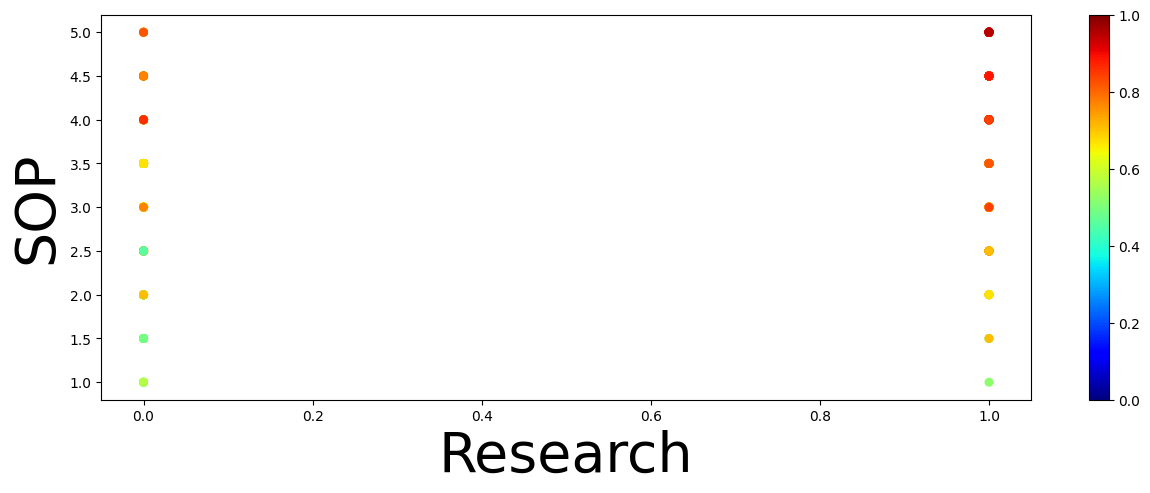

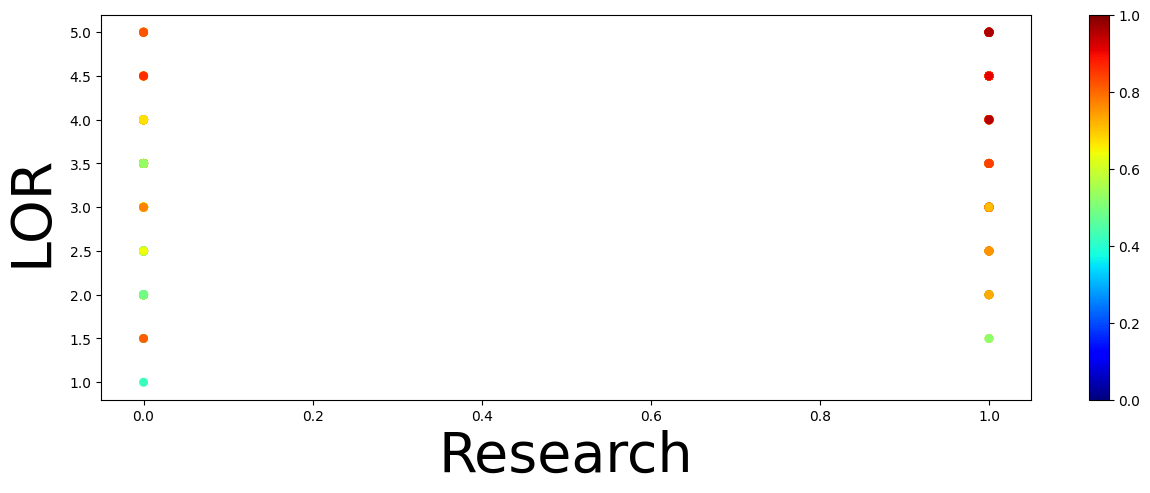

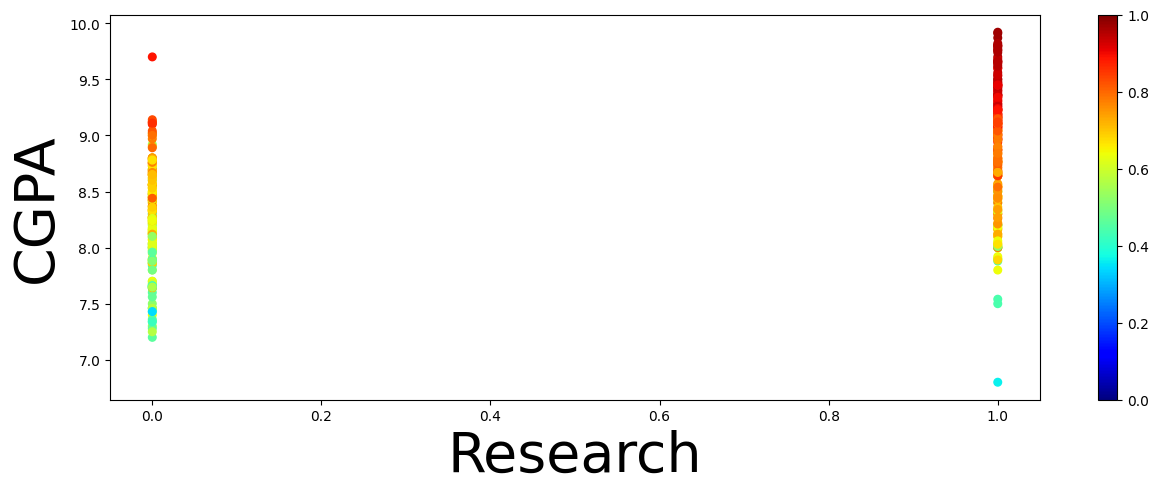

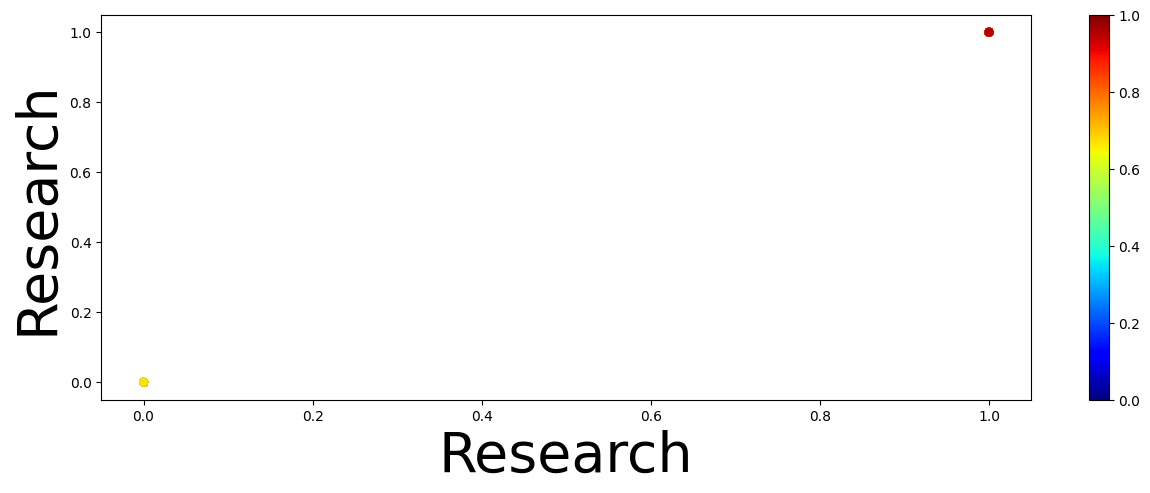

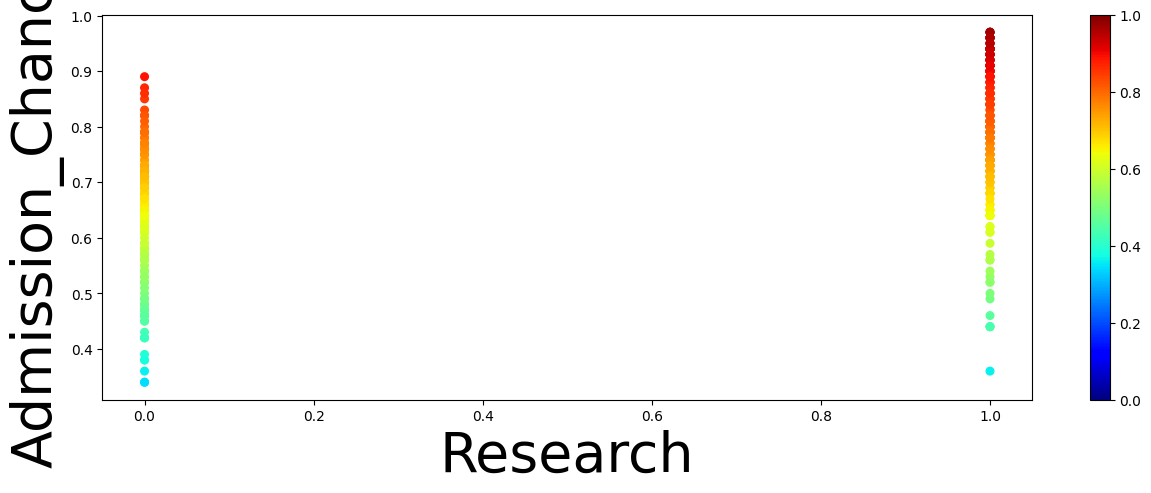

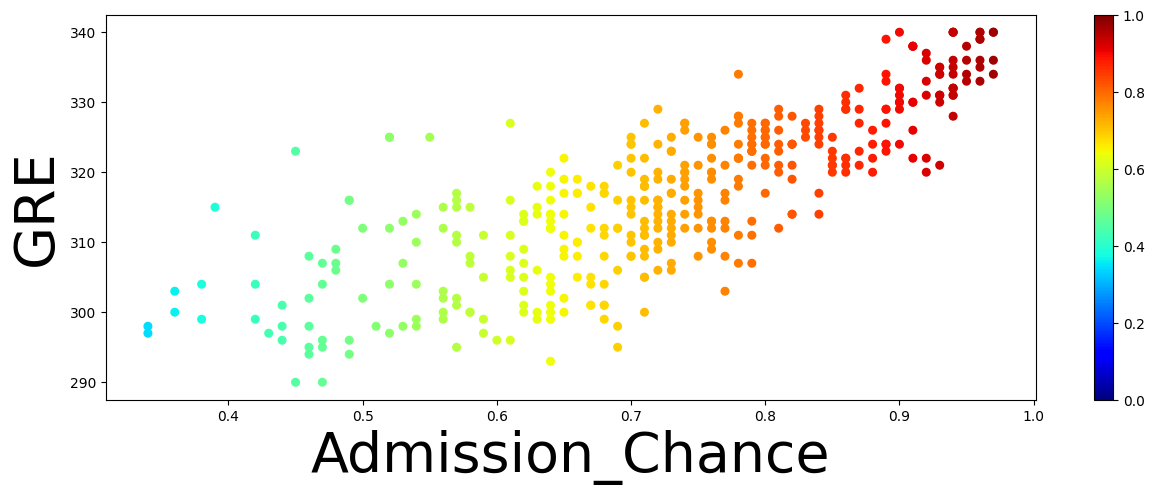

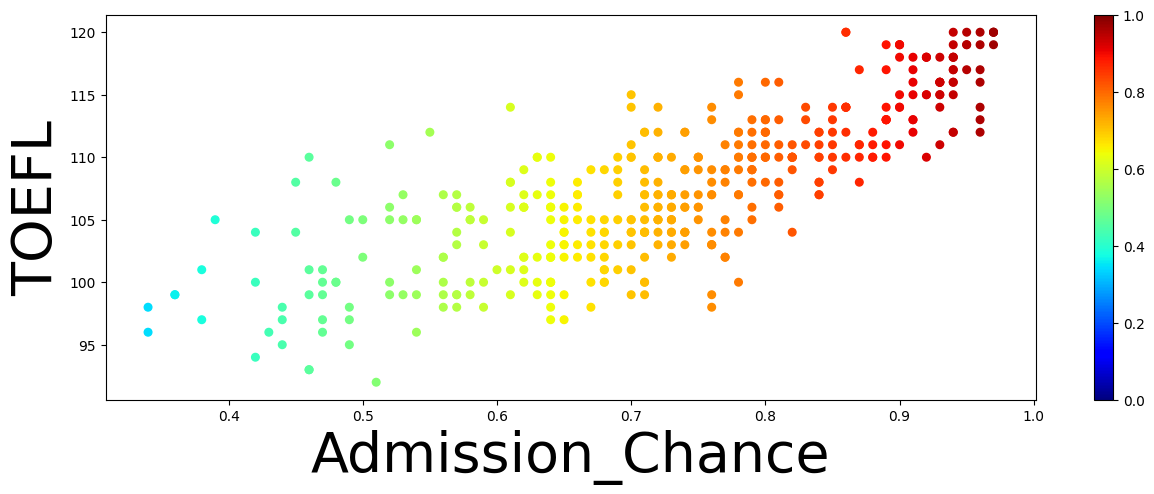

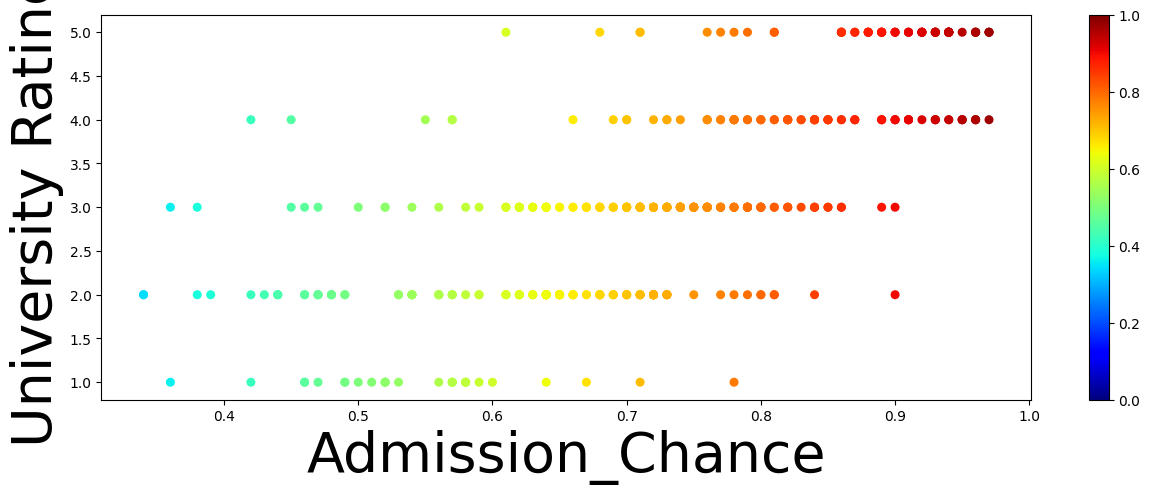

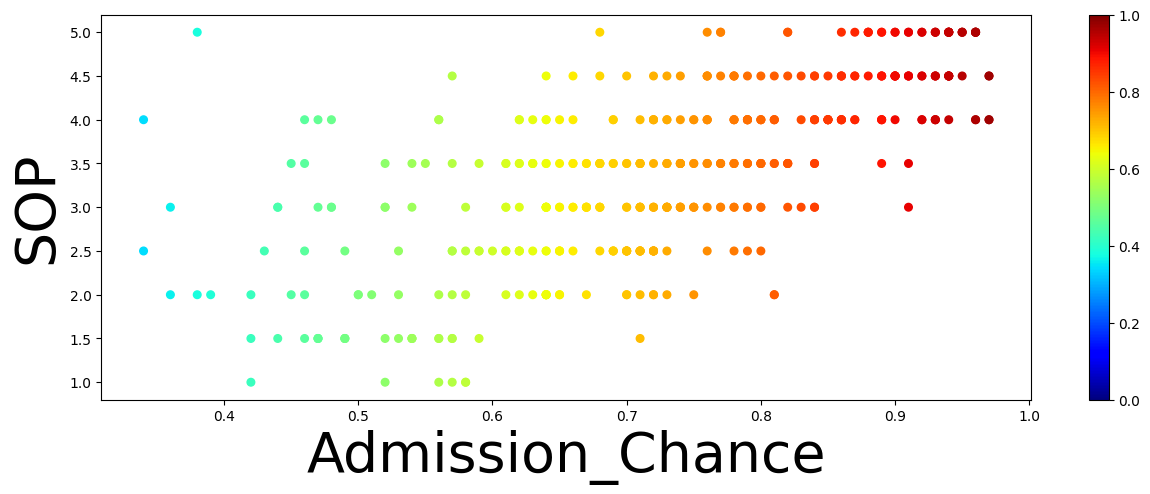

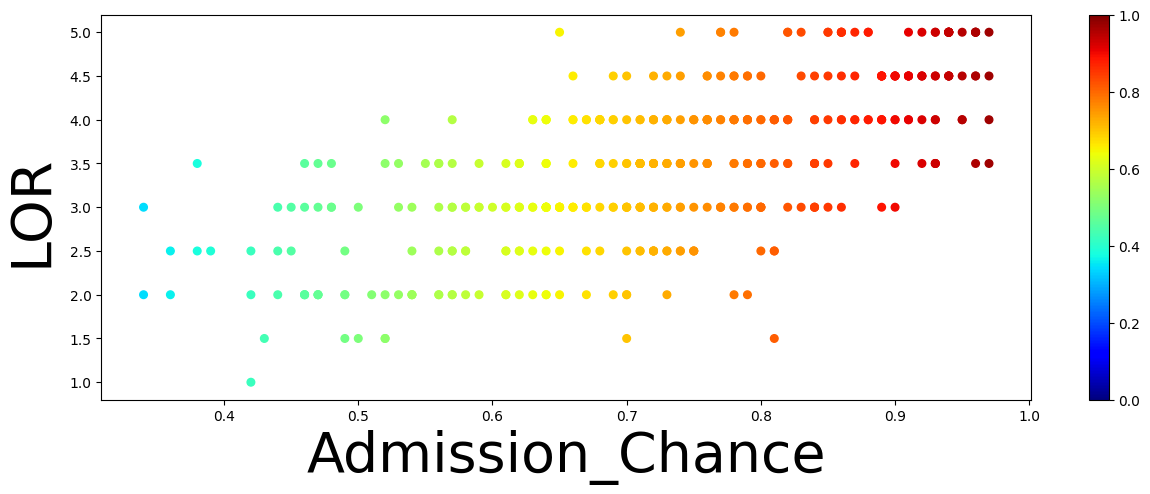

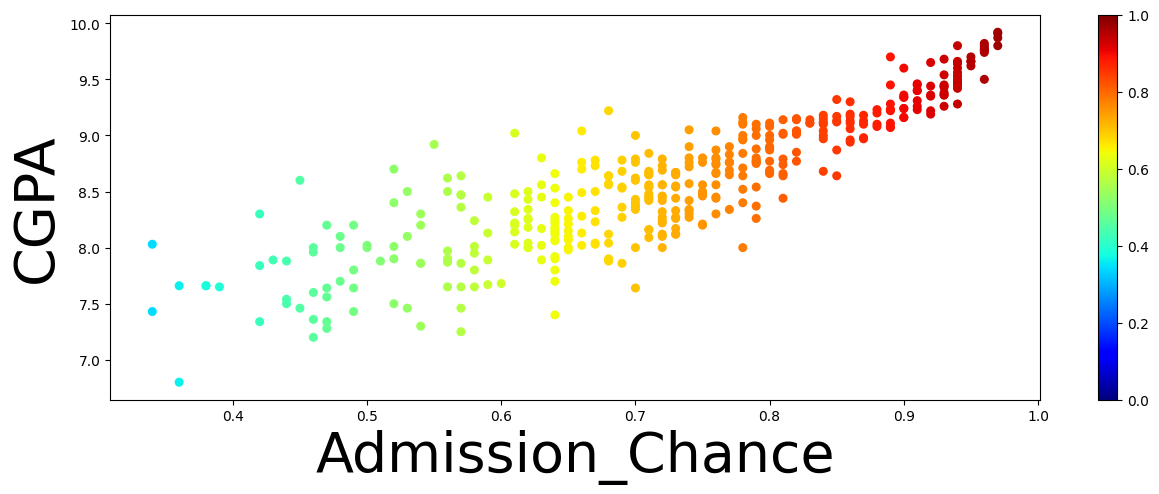

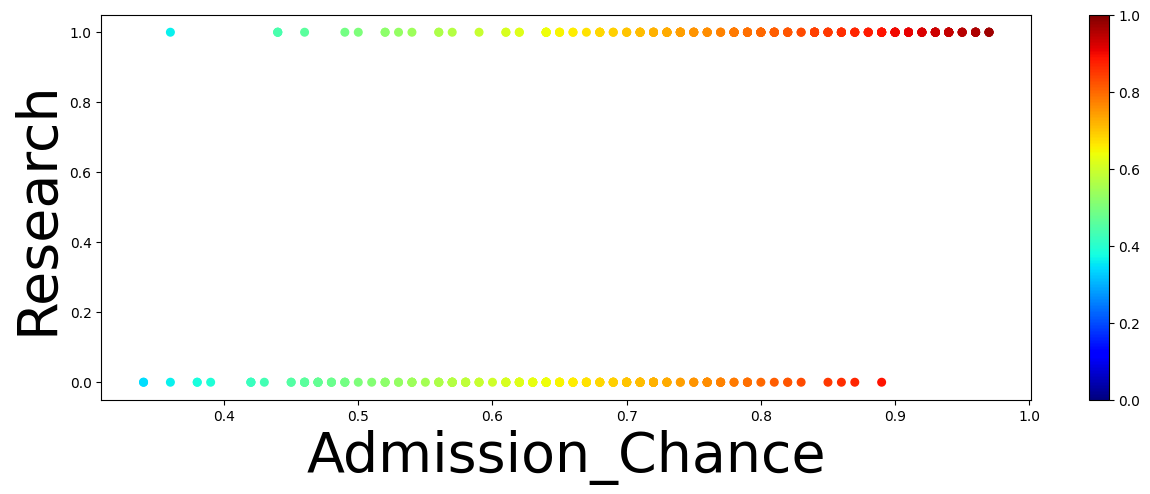

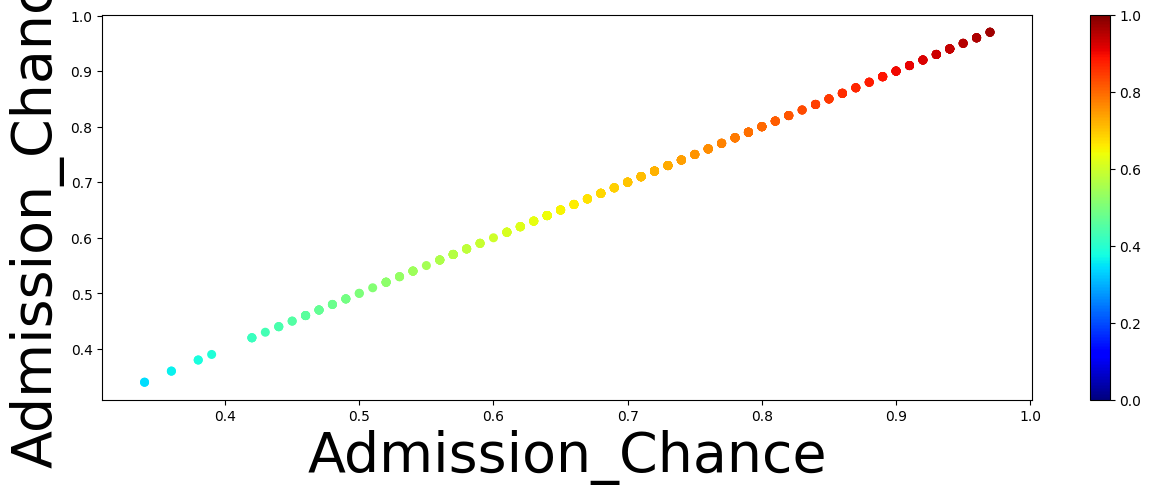

In [10]:
for column_1st in df:
    for coloum_2nd in df:
        jet=plt.get_cmap('jet')
        plt.figure(figsize=(15,5))
        plt.scatter(df[column_1st], df[coloum_2nd], s=30, c=df['Admission_Chance'], vmin=0, vmax=1, cmap=jet)
        plt.xlabel(column_1st,fontsize=40)
        plt.ylabel(coloum_2nd,fontsize=40)
        plt.colorbar()
        plt.show()

In [11]:
# define base model
def baseline_model():
    # create model
    model = Sequential()



    model.add(Dense(16, input_dim=7, activation='relu'))


    model.add(Dense(8, input_dim=7, activation='relu'))


    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [12]:
X=np.asarray(df.drop("Admission_Chance",axis=1))
Y=np.asarray(df["Admission_Chance"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [14]:

estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=3, verbose=1)

<ipython-input-14-4453c241cc79>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=3, verbose=1)


**For Checking our Model that it is not General we are using Kfolds**

In [15]:
history=estimator.fit(X_train,y_train)

Epoch 1/10
107/107 [==============================] - 1s 2ms/step - loss: 0.0545
Epoch 2/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 3/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 4/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 5/10
107/107 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 6/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 7/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 8/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 9/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 0.0043


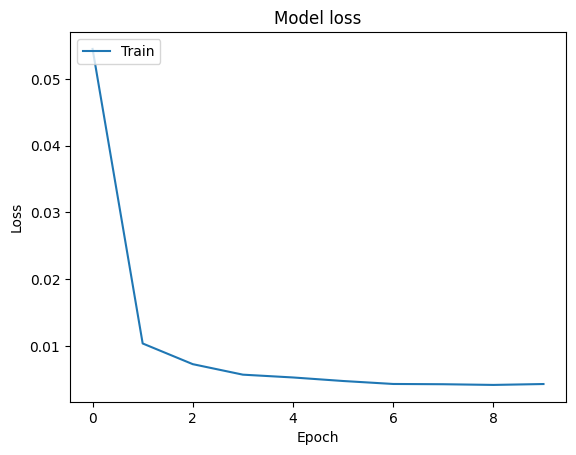

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
prediction = estimator.predict(X_test)


27/27 [==============================] - 0s 1ms/step


In [18]:

train_error =  np.abs(y_test - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)



In [19]:
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.05428418235572493
mean_error:  0.06300822189450264
min_error:  0.0012010097503661887
max_error:  0.242922465801239


[kfold validation](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)

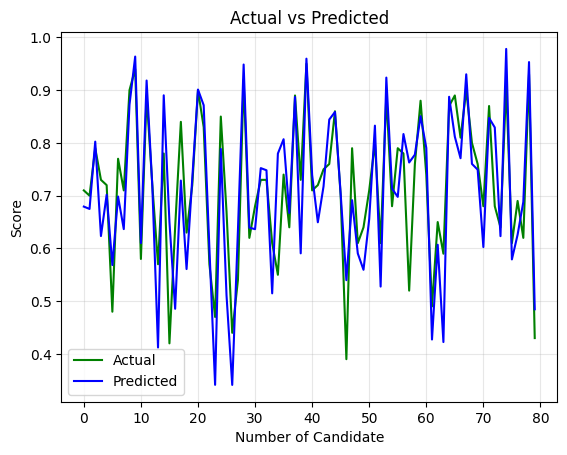

In [20]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,prediction))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(estimator.predict(X_test[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(estimator.predict(X_test[[2],:])))

train_prediction = estimator.predict(X_train)
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

r_square score:  0.6192753857625664
1/1 [==============================] - 0s 25ms/step
real value of y_test[1]: 0.7 -> the predict: 0.6748547
1/1 [==============================] - 0s 21ms/step
real value of y_test[2]: 0.79 -> the predict: 0.80246484
107/107 [==============================] - 0s 1ms/step
r_square score (train dataset):  0.8129465558811747


In [22]:
# Save the weights
estimator.model.save_weights('model_weights.h5')

# Save the model architecture
with open('model_architecture.json', 'w') as f:
    f.write(estimator.model.to_json())